In [1]:
#Library Used in all Code
import numpy as np
import pandas as pd

#Used In Rule of Mixtures
import pymatgen as pymat
import mendeleev as mendel

#Random
np.random.seed(44) # Random Seed1
import random

# PLOTTING (MATPLOTLIB)
%matplotlib inline
import matplotlib.animation as animation
from IPython.display import HTML

# PLOTTING (PLOTLY)
import plotly 
import plotly.graph_objs as go
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)

# ML
from lolopy.learners import RandomForestRegressor

# Meltheas TOOL
from simtool import findInstalledSimToolNotebooks, searchForSimTool
from simtool import getSimToolInputs, getSimToolOutputs, Run

MeltHEA = searchForSimTool('meltheas')
from IPython.display import clear_output
from IPython.display import display
from hublib.ui import FileUpload
import ipywidgets as widgets
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

<IPython.core.display.Javascript object>

# Import Initial Dataset 

In [2]:
#Get initial set for testing data
initial_data = pd.read_csv('NewSmallCompistionDataSet.csv')
initial_data = initial_data.drop(['Solid Tm'], axis=1)
initial_data = initial_data.drop(['Liquid Tm'], axis=1)
initial_data = initial_data.drop(['Minus'], axis=1)
initial_data = initial_data.drop(['Plus'], axis=1)
initial_data = initial_data.drop(['Unnamed: 0'], axis=1)
compared_df = initial_data.drop(['Simulated Tm'], axis=1)
#display(initial_data)

# All Plausible Compisition Creator

In [3]:
#Create lines to get values with .1 step size
nx = 11
x1 = np.linspace(0, 1, nx)
y, y1, y2, y3, y4 = np.meshgrid(x1, x1, x1, x1, x1)
positions = np.vstack([y.ravel(), y1.ravel(), y2.ravel(), y3.ravel(), y4.ravel()]).T

#Make dataframe with limits of all possible compistions combinations
all_permutations = pd.DataFrame(positions)
all_permutations["sum"]= all_permutations.sum(axis = 1)
plausible_compositions = all_permutations[all_permutations["sum"] == 1]

plausible_compositions = plausible_compositions[plausible_compositions[0] <= 0.5]
plausible_compositions = plausible_compositions[plausible_compositions[1] <= 0.5]
plausible_compositions = plausible_compositions[plausible_compositions[2] <= 0.5]
plausible_compositions = plausible_compositions[plausible_compositions[3] <= 0.5]
plausible_compositions = plausible_compositions[plausible_compositions[4] <= 0.5]

plausible_compositions = plausible_compositions.round(1)

plausible_compositions = plausible_compositions.drop(["sum"], axis = 1)
initial_plausible_compositions = plausible_compositions
#display(plausible_compositions)

# Apply Rule of Mixtures to Compositions

In [4]:
#string to select characteristics
actual_qued_values = ['youngs_modulus', 'atomic_radius', 'electrical_resistivity','CTE','hardness','boiling_point',
                         'atomic_mass','poissons_ratio','density_of_solid','en_gosh','melting_point']

sample = ['Cr', 'Co', 'Cu', 'Fe', 'Ni']

def get_discriptors(input_string,sample):
    #dictionary values to choose from
    string_dict = ['bulk_modulus','youngs_modulus','CTE','thermal_conductivity','boiling_point','critical_temperature',
                  'vdw_radius','average_ionic_radius','atomic_radius','atomic_number','atomic_mass','molar_volume', 
                   'density_of_solid','hardness','poissons_ratio','period','group','en_gosh','electrical_resistivity', 'melting_point']

    #Creation of dictionary
    data_set = {}

    #Make dict of lists
    for length_string in range(len(string_dict)):
        data_set[string_dict[length_string]] = []

    #all plausbile compositions from before
    df2 = plausible_compositions

    #list of all things
    que_values = []

    for item in sample:
        element_object = pymat.Element(item)
        data_set[string_dict[0]].append(element_object.bulk_modulus) #bulk_modulus
        data_set[string_dict[1]].append(element_object.youngs_modulus) #youngs_modulus
        data_set[string_dict[2]].append(element_object.coefficient_of_linear_thermal_expansion) #CTE
        data_set[string_dict[3]].append(element_object.thermal_conductivity) #thermal conductivity
        data_set[string_dict[4]].append(element_object.boiling_point) #boiling_point
        data_set[string_dict[5]].append(element_object.critical_temperature) #critical temperature
        data_set[string_dict[6]].append(element_object.van_der_waals_radius) #vander wall radius
        data_set[string_dict[7]].append(element_object.average_ionic_radius) #average ionic radius
        data_set[string_dict[8]].append(element_object.atomic_radius) #atomic radius
        data_set[string_dict[9]].append(element_object.Z) #atomic number
        data_set[string_dict[10]].append(element_object.atomic_mass) #atomic mass
        data_set[string_dict[11]].append(element_object.molar_volume) #molar volume
        data_set[string_dict[12]].append(element_object.density_of_solid) #density_solid
        data_set[string_dict[13]].append(element_object.brinell_hardness) #brinell_hardness
        data_set[string_dict[14]].append(element_object.poissons_ratio) #poissons_ratio
        data_set[string_dict[15]].append(element_object.row) #period
        data_set[string_dict[16]].append(element_object.group) #group
        data_set[string_dict[17]].append(element_object.X) #en_gosh
        data_set[string_dict[18]].append(element_object.electrical_resistivity) #electrical_resistivity
        data_set[string_dict[19]].append(element_object.melting_point) #melting_point

    for discript in input_string:
        que_values.append(data_set[discript])

    df = pd.DataFrame(data = que_values, columns = sample, index = input_string) 
    display(df)
    return df

discriptors_df = get_discriptors(actual_qued_values,sample)

Cr            Co            Cu  \
youngs_modulus          2.790000e+02  2.090000e+02  1.300000e+02   
atomic_radius           1.400000e+00  1.350000e+00  1.350000e+00   
electrical_resistivity  1.270000e-07  6.000000e-08  1.720000e-08   
CTE                     4.900000e-06  1.300000e-05  1.650000e-05   
hardness                1.120000e+03  7.000000e+02  8.740000e+02   
boiling_point           2.944000e+03  3.200000e+03  3.200000e+03   
atomic_mass             5.199610e+01  5.893319e+01  6.354600e+01   
poissons_ratio          2.100000e-01  3.100000e-01  3.400000e-01   
density_of_solid        7.140000e+03  8.900000e+03  8.920000e+03   
en_gosh                 1.660000e+00  1.880000e+00  1.900000e+00   
melting_point           2.180000e+03  1.768000e+03  1.357770e+03   

                                  Fe            Ni  
youngs_modulus          2.110000e+02  2.000000e+02  
atomic_radius           1.400000e+00  1.350000e+00  
electrical_resistivity  1.000000e-07  7.200000e-08  
CTE                     1.180000e-05  1.340000e-05  
hardness                4.900000e+02  7.000000e+02  
boiling_point           3.134000e+03  3.186000e+03  
atomic_mass             5.584500e+01  5.869340e+01  
poissons_ratio          2.900000e-01  3.100000e-01  
density_of_solid        7.874000e+03  8.908000e+03  
en_gosh                 1.830000e+00  1.910000e+00  
melting_point           1.811000e+03  1.728000e+03

In [5]:
#Rename df to match other dataframes
plausible_compositions = plausible_compositions.rename(columns = {0:'Cr',1:'Co',2:'Cu',3:'Fe', 4:'Ni'})

#Taking out replicas
df = pd.merge(plausible_compositions, compared_df, how='left', indicator = 'Exsist')
df = df[df['Exsist'] != 'both']
plausible_compositions = df.drop(['Exsist'], axis = 1)

#display(plausible_compositions)

# Applying Rule of Mixture

In [6]:
#Applu Rule of Mixtures
def rule_mixtures(df2,df,sample): 
    #Creator column of first rule mixture discriptor to concat to
    cr = 0
    for comps in sample:
        cr = cr+df2[comps]*df[comps][0]
    cr = cr.to_frame()

    #Concat rest of compistions with rule of mixtures applied
    for x in range(1,len(actual_qued_values)):
        cf = 0
        for comps in sample:
            cf = cf + df2[comps]*df[comps][x]
        cf.to_frame()
        cr = pd.concat([cr,cf], axis=1)

    #Renames columns to discriptors
    cr.columns = actual_qued_values
    return cr

plausible_compositions_rule_mixtures = rule_mixtures(plausible_compositions,discriptors_df,sample)
known_compositions_rule_mixtures = rule_mixtures(compared_df,discriptors_df,sample)
#display(plausible_compositions_rule_mixtures)

# Data Preperation

In [7]:
#Concatinate values
all_rule_mixtures = pd.concat([known_compositions_rule_mixtures,plausible_compositions_rule_mixtures])
all_compositions = pd.concat([compared_df,plausible_compositions])

#Experimental melting temperatures [K]
T_m_Cr = 2180
T_m_Co = 1768
T_m_Cu = 1358
T_m_Fe = 1811
T_m_Ni = 1728

#display(all_compositions)

In [8]:
#Set testing and training data
all_values = all_rule_mixtures.values.tolist()
all_labels = initial_data['Simulated Tm'].tolist()

# List of lists are turned into Numpy arrays to facilitate calculations in steps to follow (Normalization).
all_values = np.array(all_values, dtype = float)
all_labels = np.array(all_labels, dtype = float)

create_label = np.zeros((plausible_compositions_rule_mixtures.shape[0],), dtype = int)
all_labels = np.concatenate((all_labels,create_label), axis = 0)
#display(all_compositions)

# Getting CSVS for Sequential Learning

In [9]:
import glob
import os
import os.path, time

list_seq_learn = []

#path = '/home/nanohub/dfarache/Random_Active_Learn/Untitled Folder/'
path = os.getcwd()

print(path)

list_of_files = sorted(os.listdir(path), key=os.path.getctime)
for docs in list_of_files:
    if 'melting_8labels' in docs:
        list_seq_learn.append(docs)
print(list_seq_learn)

/home/nanohub/dfarache/Random_Active_Learn/Untitled Folder/MEI_datasetCreatorForPaper
['MEI_melting_8labels50pico0.csv', 'MEI_melting_8labels50pico1.csv']


# Random Forest Creation and Prediction

In [10]:
X = all_values.copy() #discriptors
y = all_labels.copy() #all labels  

# assign values
model = RandomForestRegressor(num_trees = 350) #model if iterate through
#print(model.__init__)

entry_number_init = initial_data.shape[0] #starting point of initial data
in_train = np.zeros(len(X), dtype=np.bool) #make all false

in_train[:entry_number_init] = True #turns false to true 

#in_train[np.where(y!=0)] = True

print('Picked {} training entries'.format(in_train.sum()))

nsamples = in_train.sum()
train_fraction = 0.8
train_idx = int(train_fraction*nsamples)

print (X.shape, y.shape)


#Get previous runs of sequential and use them
if list_seq_learn:
    y_counter = 0
    seq_learn_data = pd.read_csv(list_seq_learn[-1])
    for val in seq_learn_data['Index']:
        in_train[val] = True
        y[val] = seq_learn_data['Simulated Tm'][y_counter]
        y_counter = y_counter + 1
    
    

# Uncomment the line below to shuffle the dataset (we do not do this here to ensure consistent results for every run)
#order = np.argsort(np.random.random(all_labels.shape)) # This numpy argsort returns the indexes that would be used to shuffle a list
#order = np.arange(nsamples)
#all_values = all_values[0:nsamples][order]
#all_labels = all_labels[0:nsamples][order]

model.fit(X[:train_idx, :], y[:train_idx])
test_pred, test_std = model.predict(X[train_idx:nsamples, :], return_std=True)
pred, std = model.predict(X, return_std=True)
#print(in_train)

Picked 39 training entries
(593, 11) (593,)


In [11]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot

layout0= go.Layout(title= "Melting Temperature", hovermode= 'closest',
    xaxis= dict(title= 'Real Values',zeroline= False, gridwidth= 2),
    yaxis= dict(title= 'Predictions',zeroline= False, gridwidth= 2), height=800, width=800, font=dict(size=22))

testing= go.Scatter(x = y[train_idx:nsamples], y = test_pred, mode = 'markers', marker= dict(size= 14, color= 'red', symbol = 'x'), 
                    name= "Testing Data", error_y=dict(type='data', array=test_std,visible=True))
everything = go.Scatter(x = y[:nsamples], y = pred, mode = 'markers', marker= dict(size= 14, color= 'blue', symbol = 'x'), 
                        name= "All Data", error_y=dict(type='data', array=std,visible=True))
match = go.Scatter(x = [1700,2300], y = [1700,2300], mode = 'lines', name = "Match", line= dict( color = 'black', dash='dash'))

traces = [everything,testing,match]
fig= go.Figure(traces, layout=layout0)
fig.update_yaxes(automargin=True)
iplot(fig)
#print(model.__dict__)

# Applying Acquisition Function

79
-------------------------------------------------------------
Experiment #  0
178
[0.0, 0.1, 0.0, 0.4, 0.5]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/c8ebc8e3cae3441c9b3bb9dd342243b2/inputs.yaml
       RUNS/c8ebc8e3cae3441c9b3bb9dd342243b2
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/c8ebc8e3cae3441c9b3bb9dd342243b2/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [25:03<00:00, 60.15s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/c8ebc8e3cae3441c9b3bb9dd342243b2/inputs.yaml
       RUNS/c8ebc8e3cae3441c9b3bb9dd342243b2
Predicted melting temperature for this potential:  2636.875553731343
95% confidence interval:  3.444541737521116
Fraction of system solid:  0.00043402777777777775
Fraction of system liquid:  0.9911024305555556
Simulation Success Flag 0.0
Crystal Structure Info:  [2.000e+00 1.900e+01 1.000e+00 1.800e+01 1.000e+00 4.567e+03 4.608e+03]


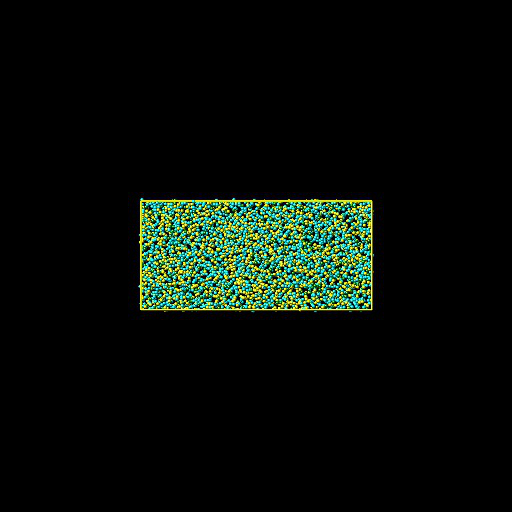

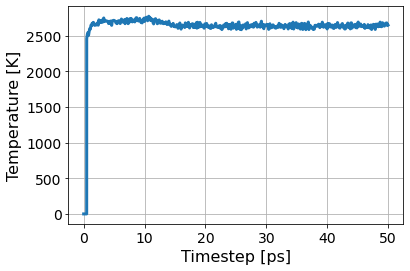

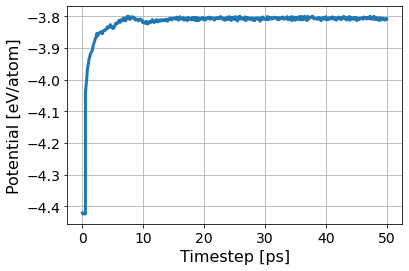

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/66cc86f3f4764c8fb71a7082cc6bb0b5/inputs.yaml
       RUNS/66cc86f3f4764c8fb71a7082cc6bb0b5
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/66cc86f3f4764c8fb71a7082cc6bb0b5/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [25:03<00:00, 60.13s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/66cc86f3f4764c8fb71a7082cc6bb0b5/inputs.yaml
       RUNS/66cc86f3f4764c8fb71a7082cc6bb0b5
Predicted melting temperature for this potential:  2451.340969651741
95% confidence interval:  3.549015529083342
Fraction of system solid:  0.0010850694444444445
Fraction of system liquid:  0.9891493055555556
Simulation Success Flag 0.0
Crystal Structure Info:  [5.000e+00 1.700e+01 3.000e+00 2.500e+01 0.000e+00 4.558e+03 4.608e+03]


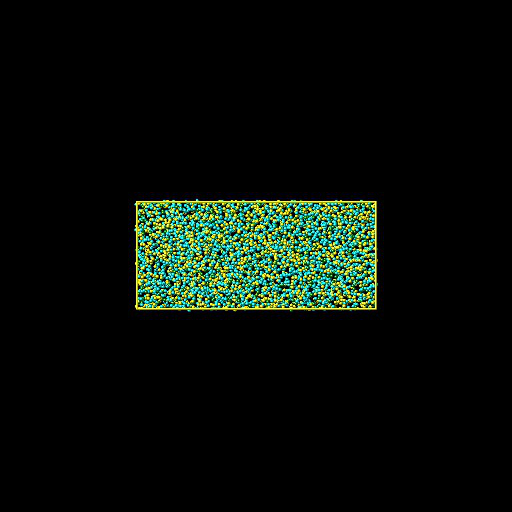

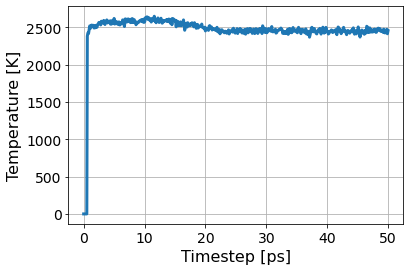

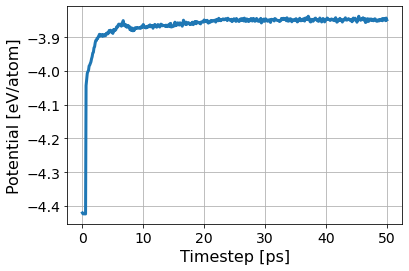

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/b9ff9e19950b4c639eec4f4c617a82d6/inputs.yaml
       RUNS/b9ff9e19950b4c639eec4f4c617a82d6
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/b9ff9e19950b4c639eec4f4c617a82d6/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [25:38<00:00, 61.53s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/b9ff9e19950b4c639eec4f4c617a82d6/inputs.yaml
       RUNS/b9ff9e19950b4c639eec4f4c617a82d6
Predicted melting temperature for this potential:  2413.9100805970147
95% confidence interval:  3.425500088451609
Fraction of system solid:  0.24110243055555555
Fraction of system liquid:  0.740234375
Simulation Success Flag 0.0
Crystal Structure Info:  [1111.   53.   18.   15.    0. 3411. 4608.]


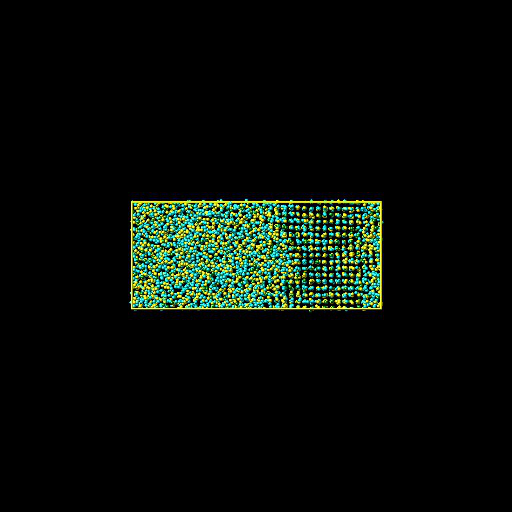

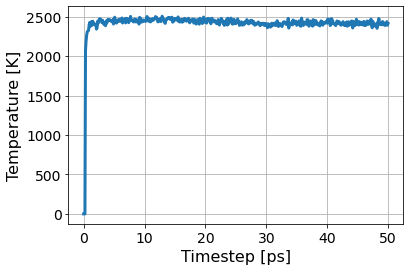

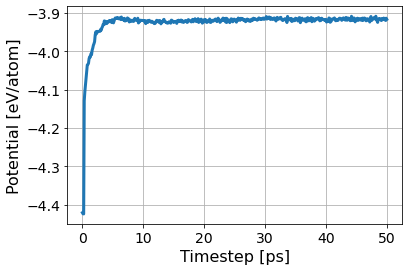

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/7347579f2d64449fa9c4e6e4b02bffbd/inputs.yaml
       RUNS/7347579f2d64449fa9c4e6e4b02bffbd
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/7347579f2d64449fa9c4e6e4b02bffbd/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [26:16<00:00, 63.05s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/7347579f2d64449fa9c4e6e4b02bffbd/inputs.yaml
       RUNS/7347579f2d64449fa9c4e6e4b02bffbd
Predicted melting temperature for this potential:  2430.155312437811
95% confidence interval:  3.5674699540703303
Fraction of system solid:  0.4644097222222222
Fraction of system liquid:  0.5154079861111112
Simulation Success Flag 1.0
Crystal Structure Info:  [2.140e+03 6.500e+01 1.900e+01 8.000e+00 1.000e+00 2.375e+03 4.608e+03]


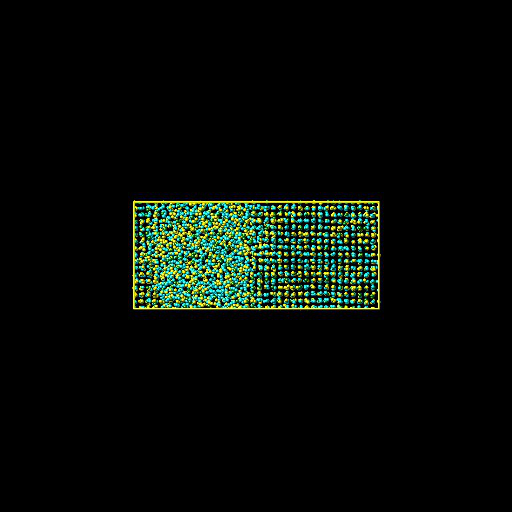

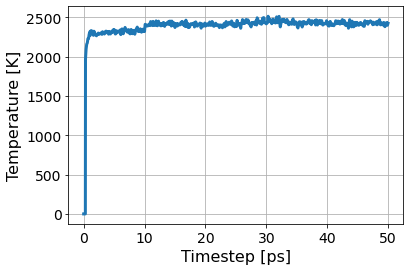

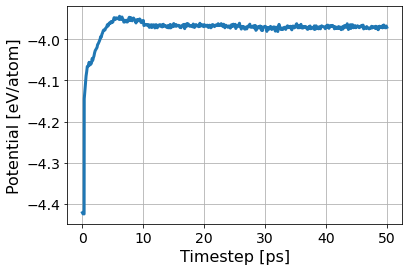

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  1
548
[0.0, 0.5, 0.0, 0.5, 0.0]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/08831d872c994e45b0ce0594e6ad050a/inputs.yaml
       RUNS/08831d872c994e45b0ce0594e6ad050a
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/08831d872c994e45b0ce0594e6ad050a/inputs.yaml


Executing: 100%|??????????| 25/25 [23:06<00:00, 55.45s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/08831d872c994e45b0ce0594e6ad050a/inputs.yaml
       RUNS/08831d872c994e45b0ce0594e6ad050a
Predicted melting temperature for this potential:  2633.097089054727
95% confidence interval:  3.1848840608782893
Fraction of system solid:  0.002170138888888889
Fraction of system liquid:  0.9887152777777778
Simulation Success Flag 0.0
Crystal Structure Info:  [1.000e+01 2.300e+01 2.000e+00 1.600e+01 1.000e+00 4.556e+03 4.608e+03]


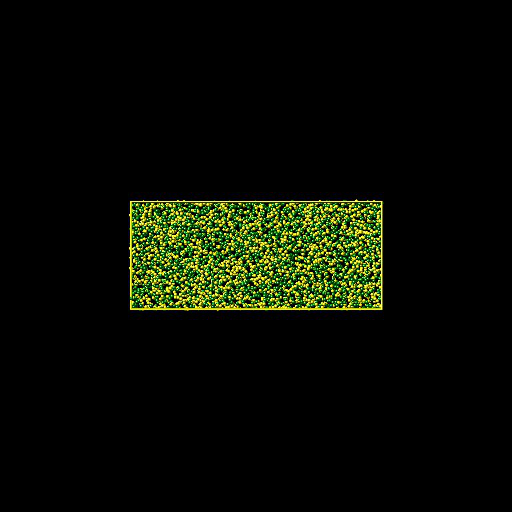

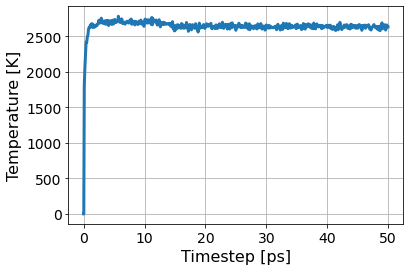

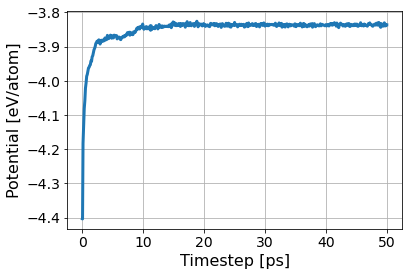

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/1bef294327ec421f93304eebec431a40/inputs.yaml
       RUNS/1bef294327ec421f93304eebec431a40
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/1bef294327ec421f93304eebec431a40/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [23:02<00:00, 55.30s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/1bef294327ec421f93304eebec431a40/inputs.yaml
       RUNS/1bef294327ec421f93304eebec431a40
Predicted melting temperature for this potential:  2529.600435323383
95% confidence interval:  3.4433361347940044
Fraction of system solid:  0.014539930555555556
Fraction of system liquid:  0.7905815972222222
Simulation Success Flag 0.0
Crystal Structure Info:  [6.700e+01 1.880e+02 6.980e+02 1.100e+01 1.000e+00 3.643e+03 4.608e+03]


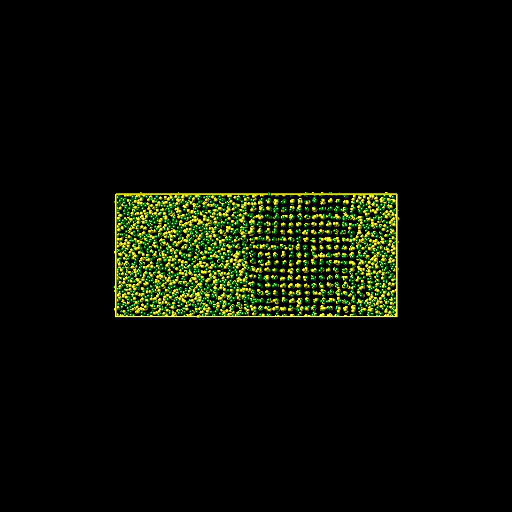

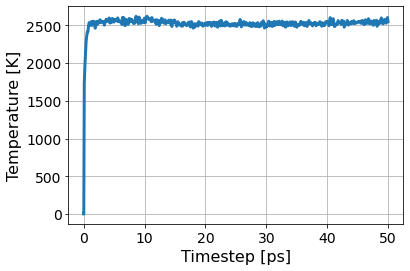

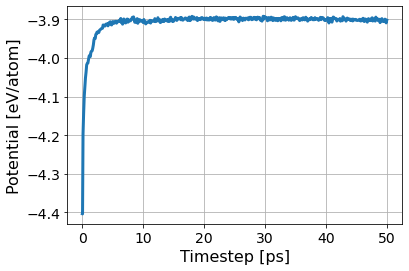

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/8d408ceafab84251b675717d45f435b5/inputs.yaml
       RUNS/8d408ceafab84251b675717d45f435b5
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/8d408ceafab84251b675717d45f435b5/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [23:23<00:00, 56.14s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/8d408ceafab84251b675717d45f435b5/inputs.yaml
       RUNS/8d408ceafab84251b675717d45f435b5
Predicted melting temperature for this potential:  2464.5810696517415
95% confidence interval:  3.3735760313632834
Fraction of system solid:  0.2658420138888889
Fraction of system liquid:  0.6866319444444444
Simulation Success Flag 0.0
Crystal Structure Info:  [1.225e+03 1.060e+02 1.030e+02 6.000e+00 4.000e+00 3.164e+03 4.608e+03]


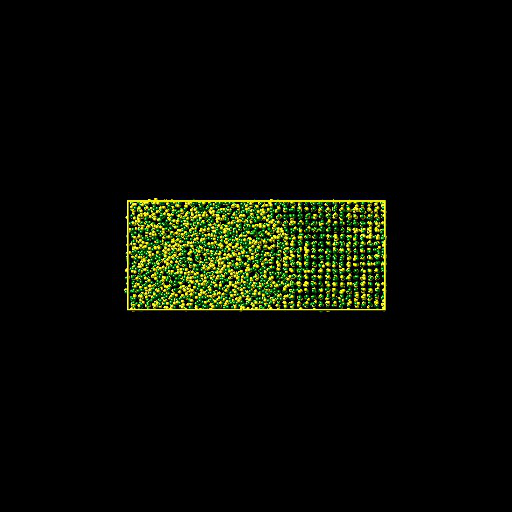

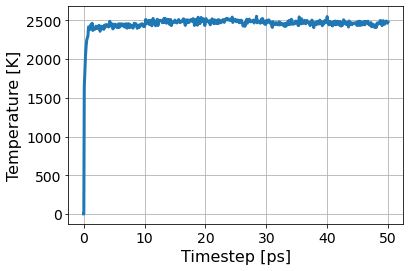

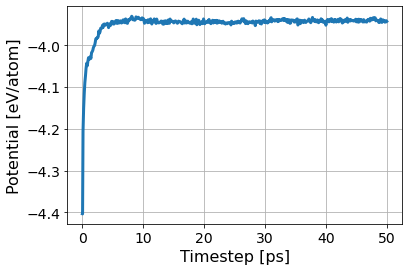

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/1404c3bc41a24b06be911cf728ccc008/inputs.yaml
       RUNS/1404c3bc41a24b06be911cf728ccc008
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/1404c3bc41a24b06be911cf728ccc008/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [23:27<00:00, 56.29s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/1404c3bc41a24b06be911cf728ccc008/inputs.yaml
       RUNS/1404c3bc41a24b06be911cf728ccc008
Predicted melting temperature for this potential:  2430.267763681592
95% confidence interval:  3.532191473809564
Fraction of system solid:  0.4618055555555556
Fraction of system liquid:  0.4969618055555556
Simulation Success Flag 1.0
Crystal Structure Info:  [2.128e+03 1.010e+02 8.600e+01 2.000e+00 1.000e+00 2.290e+03 4.608e+03]


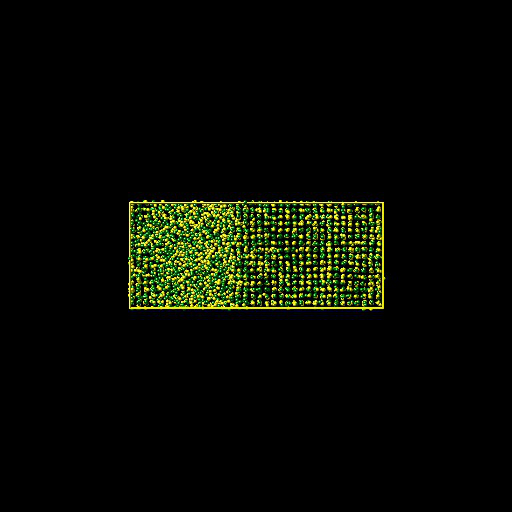

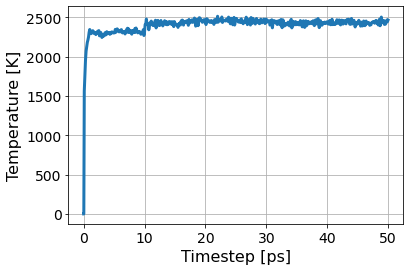

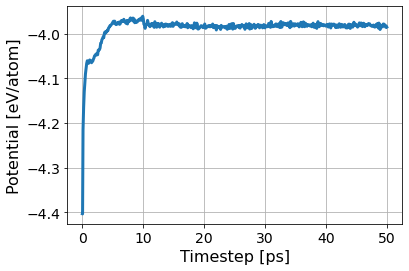

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  2
41
[0.0, 0.0, 0.1, 0.5, 0.4]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/26164e7b39ee4f6b8e8e7e959797fc3e/inputs.yaml
       RUNS/26164e7b39ee4f6b8e8e7e959797fc3e
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/26164e7b39ee4f6b8e8e7e959797fc3e/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [24:46<00:00, 59.47s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/26164e7b39ee4f6b8e8e7e959797fc3e/inputs.yaml
       RUNS/26164e7b39ee4f6b8e8e7e959797fc3e
Predicted melting temperature for this potential:  2761.1927741293534
95% confidence interval:  3.702424776317911
Fraction of system solid:  0.0008680555555555555
Fraction of system liquid:  0.9950086805555556
Simulation Success Flag 0.0
Crystal Structure Info:  [4.000e+00 1.200e+01 0.000e+00 5.000e+00 2.000e+00 4.585e+03 4.608e+03]


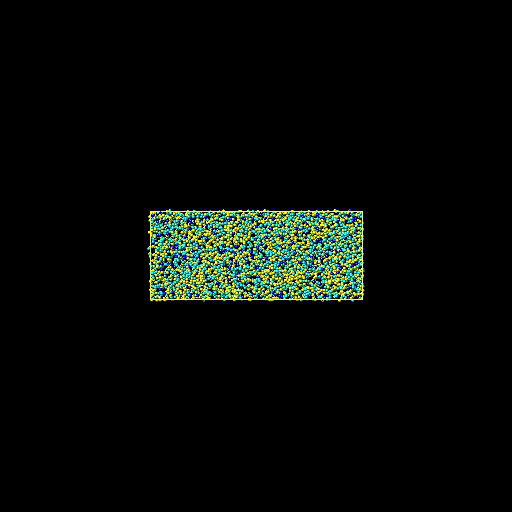

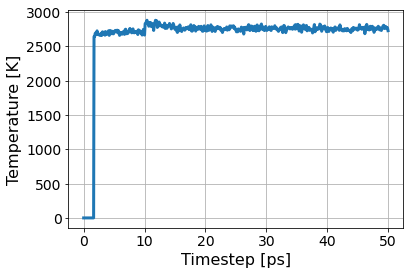

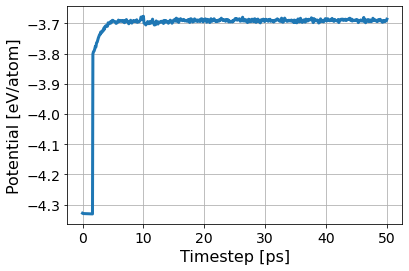

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/bcb8802ab3394126ab906984a52d113a/inputs.yaml
       RUNS/bcb8802ab3394126ab906984a52d113a
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/bcb8802ab3394126ab906984a52d113a/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [24:35<00:00, 59.03s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/bcb8802ab3394126ab906984a52d113a/inputs.yaml
       RUNS/bcb8802ab3394126ab906984a52d113a
Predicted melting temperature for this potential:  2584.7261597014926
95% confidence interval:  3.546629529280203
Fraction of system solid:  0.0013020833333333333
Fraction of system liquid:  0.9945746527777778
Simulation Success Flag 0.0
Crystal Structure Info:  [6.000e+00 9.000e+00 2.000e+00 8.000e+00 0.000e+00 4.583e+03 4.608e+03]


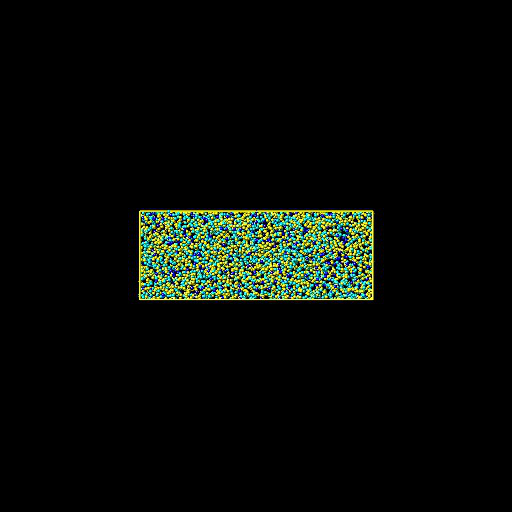

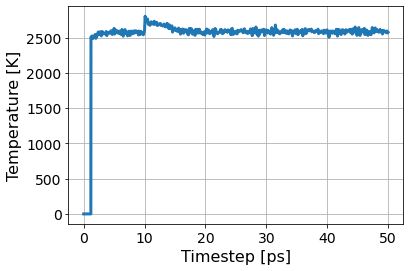

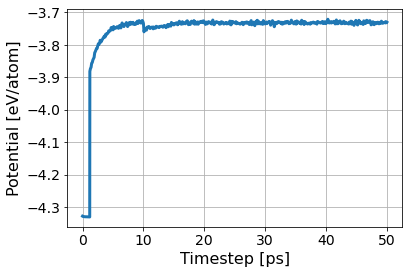

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/670f10f33eea4c16a35f076323be4e3c/inputs.yaml
       RUNS/670f10f33eea4c16a35f076323be4e3c
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/670f10f33eea4c16a35f076323be4e3c/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [25:18<00:00, 60.76s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/670f10f33eea4c16a35f076323be4e3c/inputs.yaml
       RUNS/670f10f33eea4c16a35f076323be4e3c
Predicted melting temperature for this potential:  2407.3697278606965
95% confidence interval:  2.927349500641981
Fraction of system solid:  0.0006510416666666666
Fraction of system liquid:  0.9915364583333334
Simulation Success Flag 0.0
Crystal Structure Info:  [3.000e+00 1.800e+01 1.000e+00 1.700e+01 0.000e+00 4.569e+03 4.608e+03]


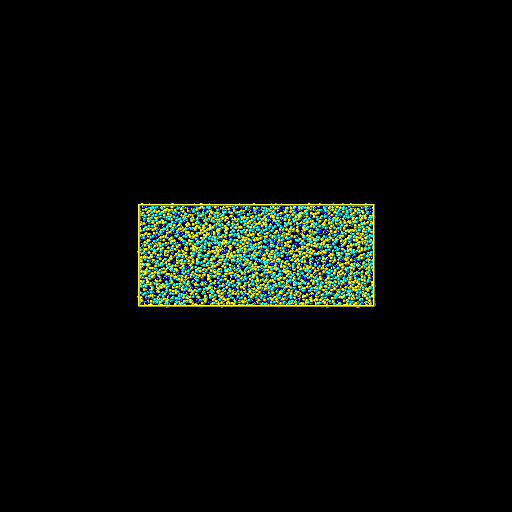

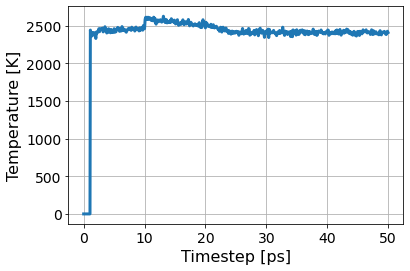

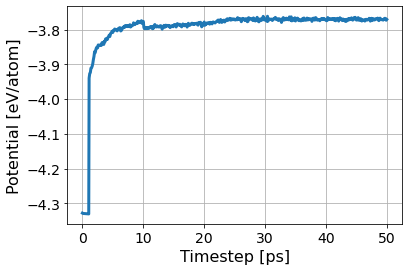

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/44ffa94bbff34f0f9cbc981a3cc335b2/inputs.yaml
       RUNS/44ffa94bbff34f0f9cbc981a3cc335b2
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/44ffa94bbff34f0f9cbc981a3cc335b2/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [24:31<00:00, 58.86s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/44ffa94bbff34f0f9cbc981a3cc335b2/inputs.yaml
       RUNS/44ffa94bbff34f0f9cbc981a3cc335b2
Predicted melting temperature for this potential:  2399.266044278607
95% confidence interval:  3.139761093753152
Fraction of system solid:  0.3474392361111111
Fraction of system liquid:  0.6343315972222222
Simulation Success Flag 0.0
Crystal Structure Info:  [1.601e+03 5.000e+01 2.700e+01 6.000e+00 1.000e+00 2.923e+03 4.608e+03]


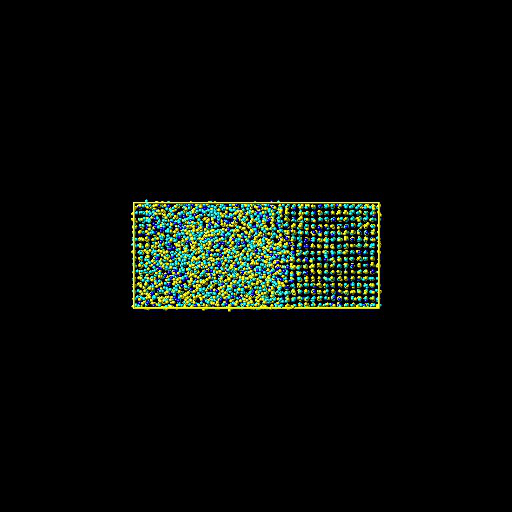

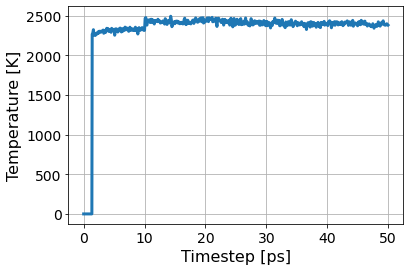

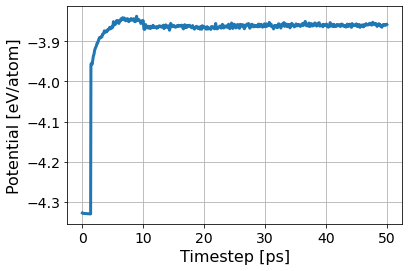

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/616785e19eaa4559ae6521e7b7296d18/inputs.yaml
       RUNS/616785e19eaa4559ae6521e7b7296d18
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/616785e19eaa4559ae6521e7b7296d18/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [25:09<00:00, 60.38s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/616785e19eaa4559ae6521e7b7296d18/inputs.yaml
       RUNS/616785e19eaa4559ae6521e7b7296d18
Predicted melting temperature for this potential:  2385.5469631840797
95% confidence interval:  3.8247830144317296
Fraction of system solid:  0.6171875
Fraction of system liquid:  0.3695746527777778
Simulation Success Flag 1.0
Crystal Structure Info:  [2.844e+03 3.900e+01 1.800e+01 3.000e+00 1.000e+00 1.703e+03 4.608e+03]


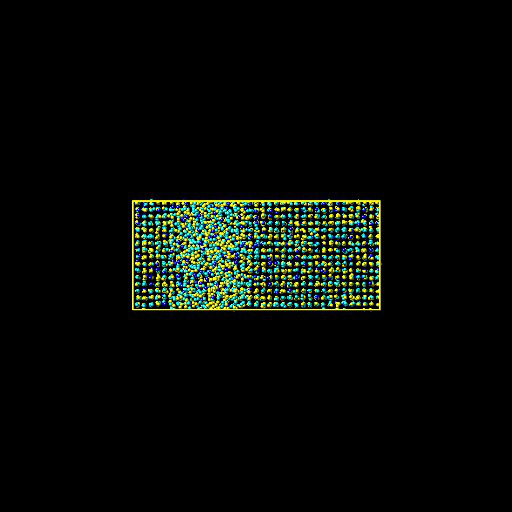

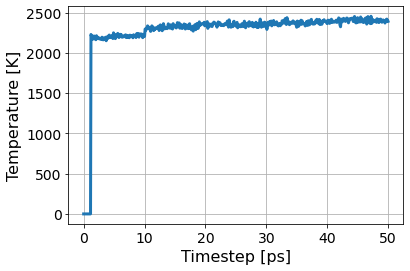

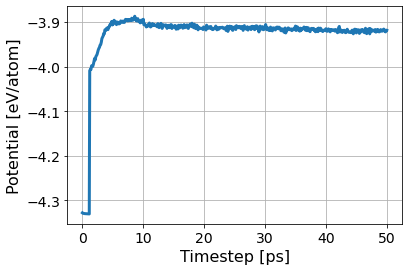

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  3
299
[0.0, 0.2, 0.0, 0.4, 0.4]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/8d94629ef9ec4373a5b33fe2ed5155dc/inputs.yaml
       RUNS/8d94629ef9ec4373a5b33fe2ed5155dc
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/8d94629ef9ec4373a5b33fe2ed5155dc/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [24:19<00:00, 58.39s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/8d94629ef9ec4373a5b33fe2ed5155dc/inputs.yaml
       RUNS/8d94629ef9ec4373a5b33fe2ed5155dc
Predicted melting temperature for this potential:  2622.1999626865672
95% confidence interval:  3.4727344011305847
Fraction of system solid:  0.0010850694444444445
Fraction of system liquid:  0.9913194444444444
Simulation Success Flag 0.0
Crystal Structure Info:  [   5.   17.    0.   13.    5. 4568. 4608.]


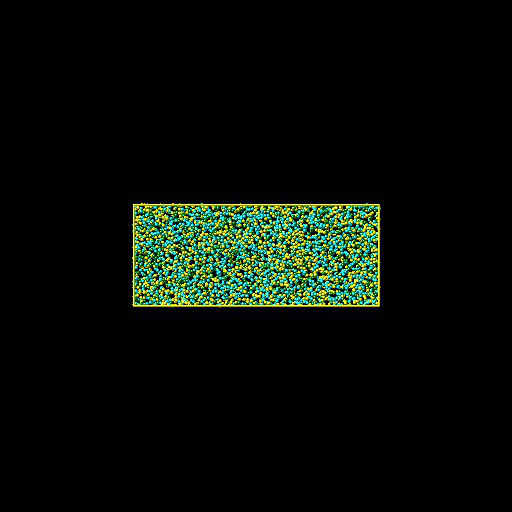

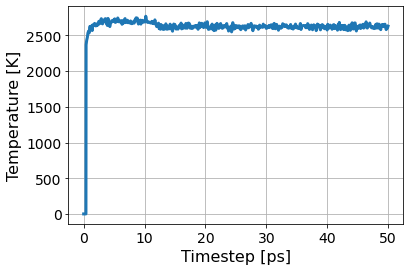

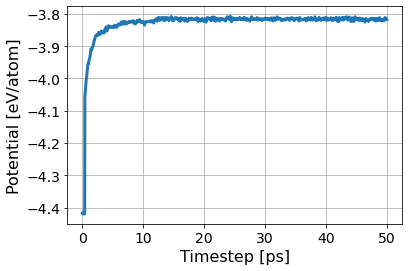

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/0cedda94c13048bfa9d3ce12e15912a3/inputs.yaml
       RUNS/0cedda94c13048bfa9d3ce12e15912a3
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/0cedda94c13048bfa9d3ce12e15912a3/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [25:16<00:00, 60.66s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/0cedda94c13048bfa9d3ce12e15912a3/inputs.yaml
       RUNS/0cedda94c13048bfa9d3ce12e15912a3
Predicted melting temperature for this potential:  2412.5127368159206
95% confidence interval:  5.108916460712086
Fraction of system solid:  0.0010850694444444445
Fraction of system liquid:  0.9867621527777778
Simulation Success Flag 0.0
Crystal Structure Info:  [5.000e+00 3.000e+01 4.000e+00 2.000e+01 2.000e+00 4.547e+03 4.608e+03]


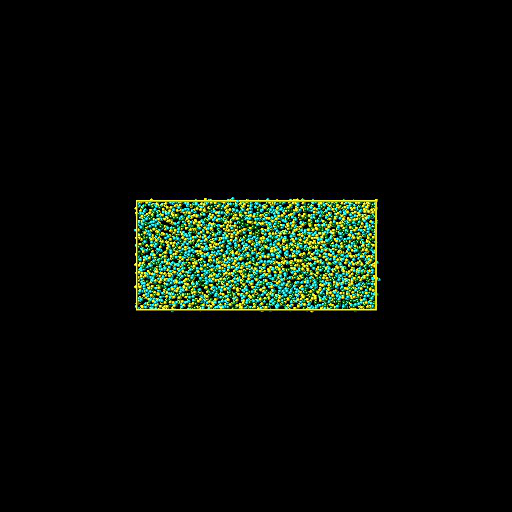

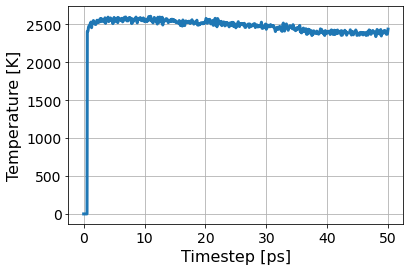

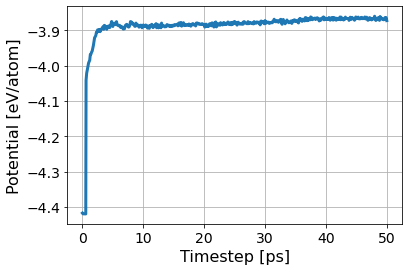

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/a5f5fd55acf24a4d811144719be5d79a/inputs.yaml
       RUNS/a5f5fd55acf24a4d811144719be5d79a
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/a5f5fd55acf24a4d811144719be5d79a/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [18:01<00:00, 43.25s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/a5f5fd55acf24a4d811144719be5d79a/inputs.yaml
       RUNS/a5f5fd55acf24a4d811144719be5d79a
Predicted melting temperature for this potential:  2430.624491044776
95% confidence interval:  3.5634073173292045
Fraction of system solid:  0.2250434027777778
Fraction of system liquid:  0.755859375
Simulation Success Flag 0.0
Crystal Structure Info:  [1.037e+03 5.500e+01 1.900e+01 1.300e+01 1.000e+00 3.483e+03 4.608e+03]


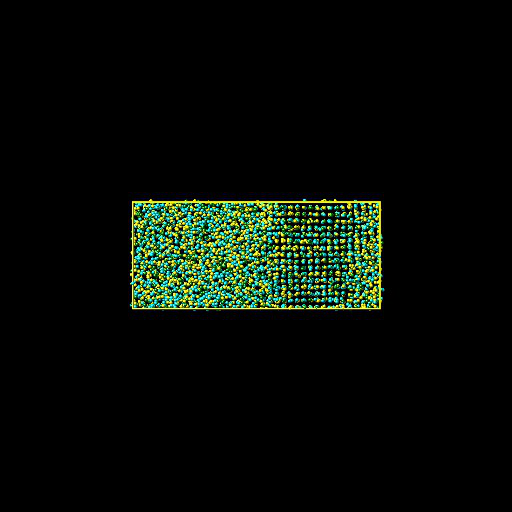

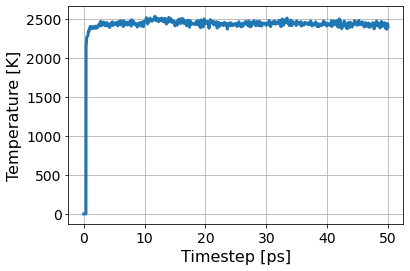

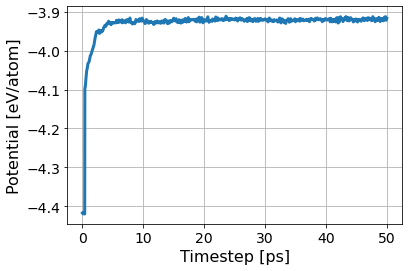

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/74221e5ced054dd293d9fb6014871333/inputs.yaml
       RUNS/74221e5ced054dd293d9fb6014871333
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/74221e5ced054dd293d9fb6014871333/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [18:08<00:00, 43.53s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/74221e5ced054dd293d9fb6014871333/inputs.yaml
       RUNS/74221e5ced054dd293d9fb6014871333
Predicted melting temperature for this potential:  2406.9864039800996
95% confidence interval:  4.132008885229872
Fraction of system solid:  0.4852430555555556
Fraction of system liquid:  0.4967447916666667
Simulation Success Flag 1.0
Crystal Structure Info:  [2236.   48.   26.    9.    0. 2289. 4608.]


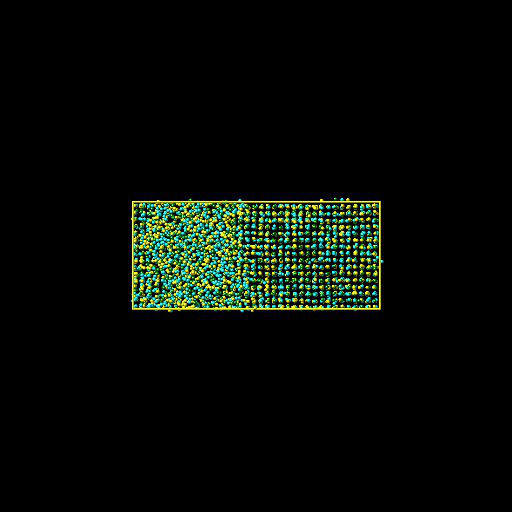

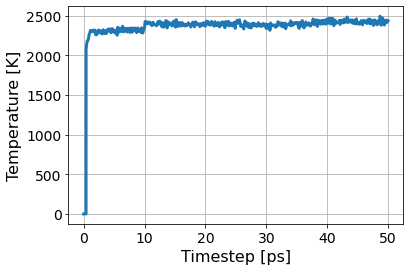

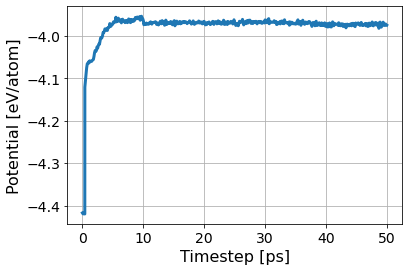

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  4
395
[0.0, 0.3, 0.0, 0.4, 0.3]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/2f032baf76af4ded95ad4ded9a869d24/inputs.yaml
       RUNS/2f032baf76af4ded95ad4ded9a869d24
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/2f032baf76af4ded95ad4ded9a869d24/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [17:54<00:00, 42.98s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/2f032baf76af4ded95ad4ded9a869d24/inputs.yaml
       RUNS/2f032baf76af4ded95ad4ded9a869d24
Predicted melting temperature for this potential:  2576.350376119403
95% confidence interval:  3.398461943321245
Fraction of system solid:  0.0013020833333333333
Fraction of system liquid:  0.9891493055555556
Simulation Success Flag 0.0
Crystal Structure Info:  [6.000e+00 2.400e+01 4.000e+00 1.600e+01 0.000e+00 4.558e+03 4.608e+03]


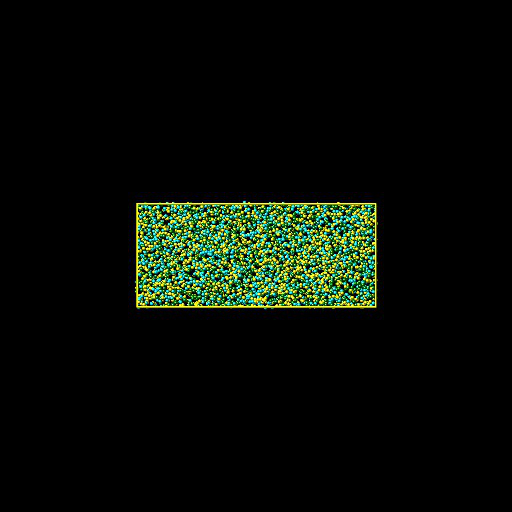

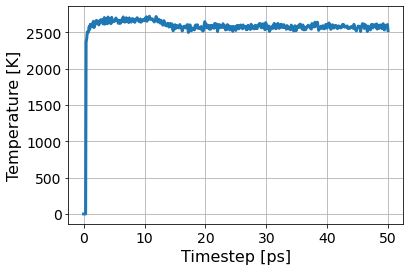

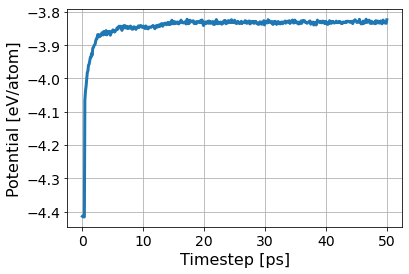

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/5d67ec89366348f686d5de0172cbf205/inputs.yaml
       RUNS/5d67ec89366348f686d5de0172cbf205
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/5d67ec89366348f686d5de0172cbf205/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [17:56<00:00, 43.06s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/5d67ec89366348f686d5de0172cbf205/inputs.yaml
       RUNS/5d67ec89366348f686d5de0172cbf205
Predicted melting temperature for this potential:  2359.1977194029846
95% confidence interval:  2.9636670390704594
Fraction of system solid:  0.0030381944444444445
Fraction of system liquid:  0.9852430555555556
Simulation Success Flag 0.0
Crystal Structure Info:  [  14.   22.    5.   27.    0. 4540. 4608.]


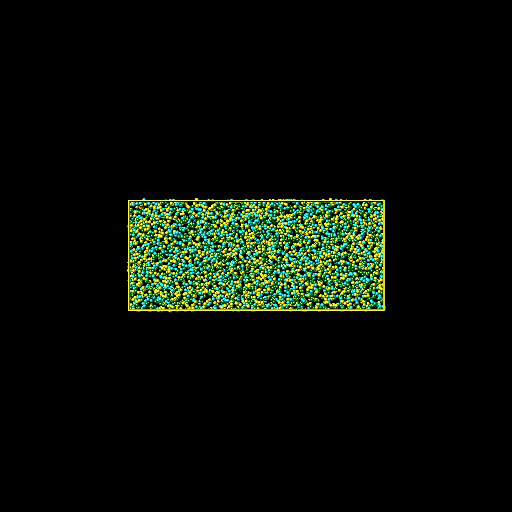

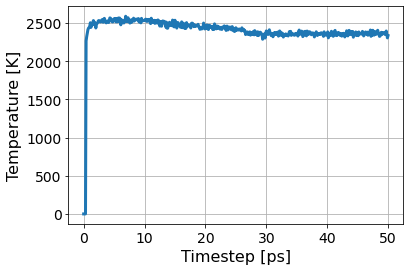

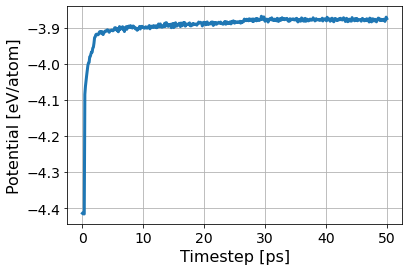

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/5a81c409c15c4d8588f6c5ab2a6b56e4/inputs.yaml
       RUNS/5a81c409c15c4d8588f6c5ab2a6b56e4
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/5a81c409c15c4d8588f6c5ab2a6b56e4/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [18:09<00:00, 43.58s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/5a81c409c15c4d8588f6c5ab2a6b56e4/inputs.yaml
       RUNS/5a81c409c15c4d8588f6c5ab2a6b56e4
Predicted melting temperature for this potential:  2423.0912437810944
95% confidence interval:  3.7296642069965746
Fraction of system solid:  0.2877604166666667
Fraction of system liquid:  0.6868489583333334
Simulation Success Flag 0.0
Crystal Structure Info:  [1.326e+03 6.500e+01 3.300e+01 1.800e+01 1.000e+00 3.165e+03 4.608e+03]


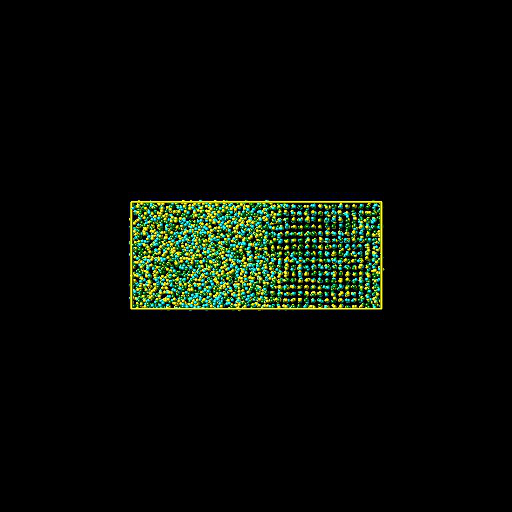

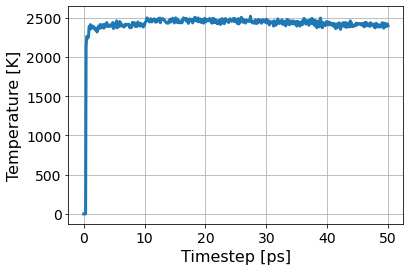

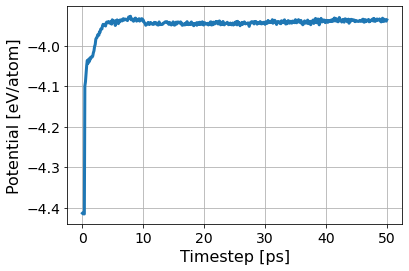

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/412e8c3571114efbb93e55368823922b/inputs.yaml
       RUNS/412e8c3571114efbb93e55368823922b
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/412e8c3571114efbb93e55368823922b/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [18:31<00:00, 44.44s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/412e8c3571114efbb93e55368823922b/inputs.yaml
       RUNS/412e8c3571114efbb93e55368823922b
Predicted melting temperature for this potential:  2398.7310029850746
95% confidence interval:  3.150231307542802
Fraction of system solid:  0.4850260416666667
Fraction of system liquid:  0.494140625
Simulation Success Flag 1.0
Crystal Structure Info:  [2235.   61.   26.    9.    0. 2277. 4608.]


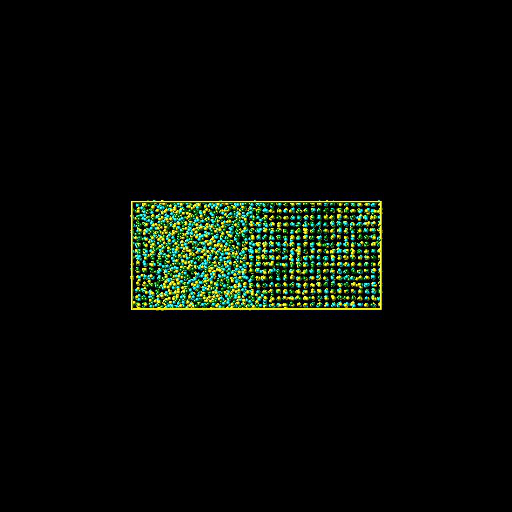

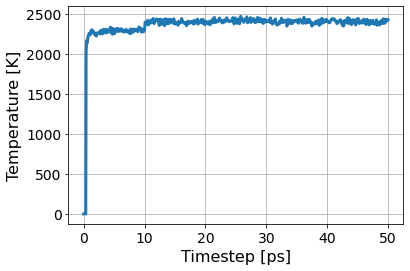

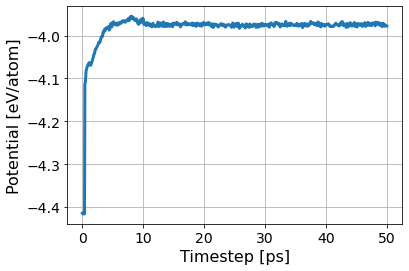

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  5
547
[0.0, 0.5, 0.0, 0.4, 0.1]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/f76d811c86ce44e596edd6a3d367c33c/inputs.yaml
       RUNS/f76d811c86ce44e596edd6a3d367c33c
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/f76d811c86ce44e596edd6a3d367c33c/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [17:38<00:00, 42.32s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/f76d811c86ce44e596edd6a3d367c33c/inputs.yaml
       RUNS/f76d811c86ce44e596edd6a3d367c33c
Predicted melting temperature for this potential:  2538.811904975124
95% confidence interval:  3.3830362148215944
Fraction of system solid:  0.0015190972222222222
Fraction of system liquid:  0.9898003472222222
Simulation Success Flag 0.0
Crystal Structure Info:  [7.000e+00 1.900e+01 2.000e+00 1.900e+01 0.000e+00 4.561e+03 4.608e+03]


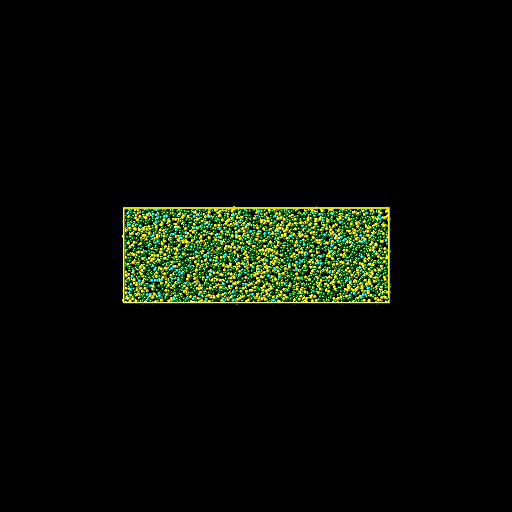

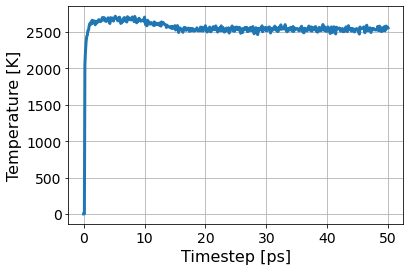

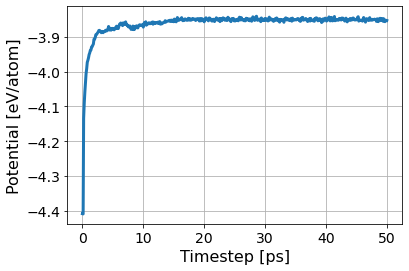

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/04e7fa70f78441ae95ee2231c70e7aa3/inputs.yaml
       RUNS/04e7fa70f78441ae95ee2231c70e7aa3
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/04e7fa70f78441ae95ee2231c70e7aa3/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [17:36<00:00, 42.27s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/04e7fa70f78441ae95ee2231c70e7aa3/inputs.yaml
       RUNS/04e7fa70f78441ae95ee2231c70e7aa3
Predicted melting temperature for this potential:  2373.123532835821
95% confidence interval:  3.336816206675937
Fraction of system solid:  0.001953125
Fraction of system liquid:  0.9861111111111112
Simulation Success Flag 0.0
Crystal Structure Info:  [9.000e+00 2.900e+01 2.000e+00 2.300e+01 1.000e+00 4.544e+03 4.608e+03]


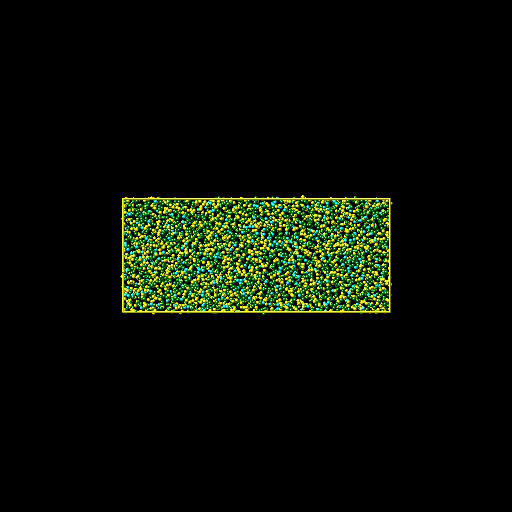

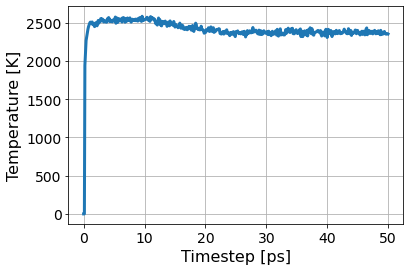

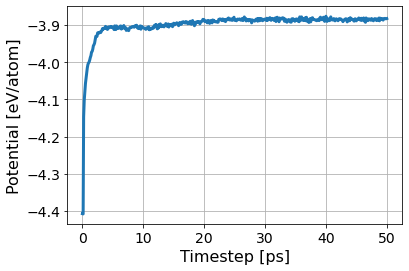

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/c691307fe90947e9bc8b337ba533cc16/inputs.yaml
       RUNS/c691307fe90947e9bc8b337ba533cc16
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/c691307fe90947e9bc8b337ba533cc16/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [17:27<00:00, 41.89s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/c691307fe90947e9bc8b337ba533cc16/inputs.yaml
       RUNS/c691307fe90947e9bc8b337ba533cc16
Predicted melting temperature for this potential:  2437.644721393035
95% confidence interval:  3.0414182332860986
Fraction of system solid:  0.2565104166666667
Fraction of system liquid:  0.7131076388888888
Simulation Success Flag 0.0
Crystal Structure Info:  [1.182e+03 6.100e+01 6.600e+01 1.200e+01 1.000e+00 3.286e+03 4.608e+03]


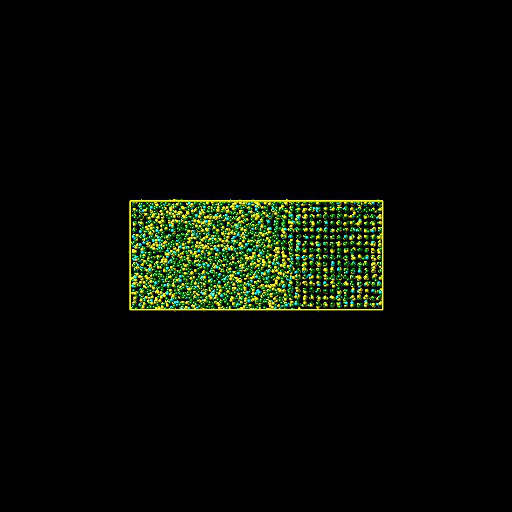

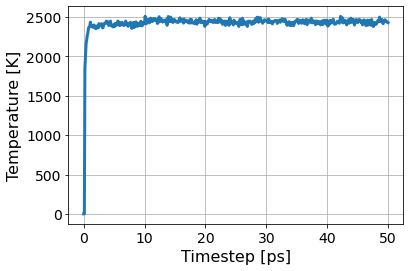

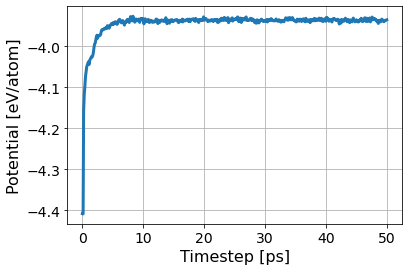

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/665e04affb9b47f391e9bef96113a9aa/inputs.yaml
       RUNS/665e04affb9b47f391e9bef96113a9aa
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/665e04affb9b47f391e9bef96113a9aa/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [17:38<00:00, 42.32s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/665e04affb9b47f391e9bef96113a9aa/inputs.yaml
       RUNS/665e04affb9b47f391e9bef96113a9aa
Predicted melting temperature for this potential:  2439.852527363184
95% confidence interval:  3.4877223187140065
Fraction of system solid:  0.5258246527777778
Fraction of system liquid:  0.4440104166666667
Simulation Success Flag 1.0
Crystal Structure Info:  [2.423e+03 8.300e+01 4.600e+01 9.000e+00 1.000e+00 2.046e+03 4.608e+03]


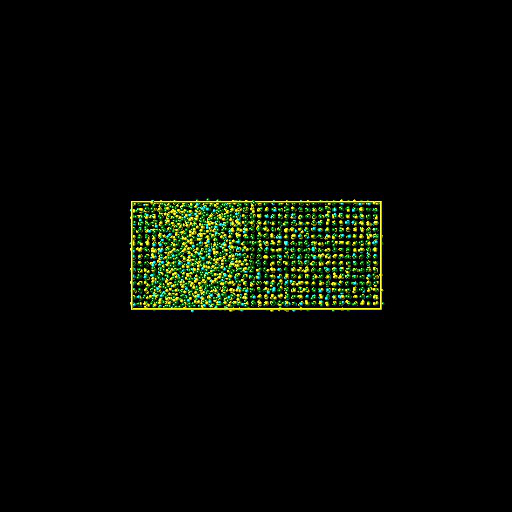

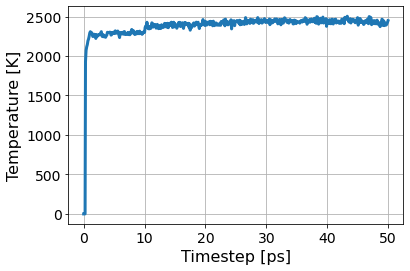

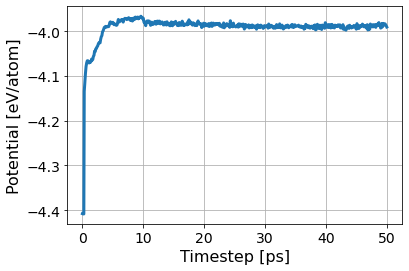

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  6
476
[0.0, 0.4, 0.0, 0.4, 0.2]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/ccd202ab5649448fb060b119af32fcf9/inputs.yaml
       RUNS/ccd202ab5649448fb060b119af32fcf9
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/ccd202ab5649448fb060b119af32fcf9/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [17:28<00:00, 41.96s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/ccd202ab5649448fb060b119af32fcf9/inputs.yaml
       RUNS/ccd202ab5649448fb060b119af32fcf9
Predicted melting temperature for this potential:  2573.200176119403
95% confidence interval:  3.3440634635783044
Fraction of system solid:  0.0010850694444444445
Fraction of system liquid:  0.9906684027777778
Simulation Success Flag 0.0
Crystal Structure Info:  [5.000e+00 1.700e+01 1.000e+00 1.800e+01 2.000e+00 4.565e+03 4.608e+03]


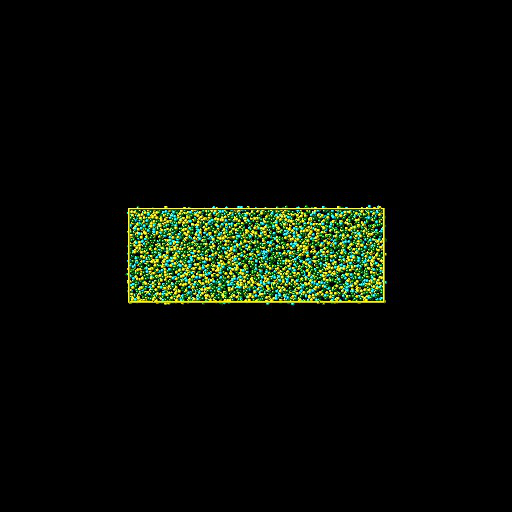

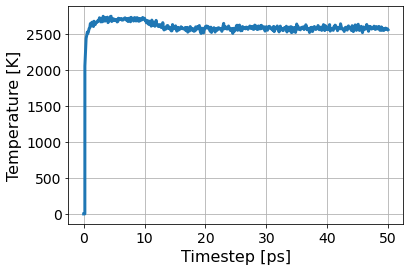

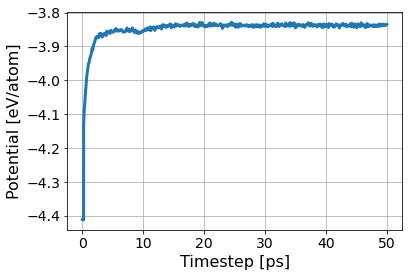

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/02bea72241214025ac378be5c1bb6ff8/inputs.yaml
       RUNS/02bea72241214025ac378be5c1bb6ff8
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/02bea72241214025ac378be5c1bb6ff8/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [17:27<00:00, 41.88s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/02bea72241214025ac378be5c1bb6ff8/inputs.yaml
       RUNS/02bea72241214025ac378be5c1bb6ff8
Predicted melting temperature for this potential:  2400.2142781094526
95% confidence interval:  3.046719897499222
Fraction of system solid:  0.0013020833333333333
Fraction of system liquid:  0.9861111111111112
Simulation Success Flag 0.0
Crystal Structure Info:  [6.000e+00 2.900e+01 1.000e+00 2.700e+01 1.000e+00 4.544e+03 4.608e+03]


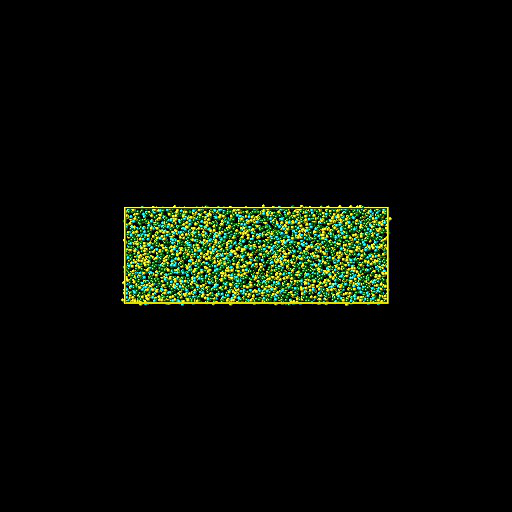

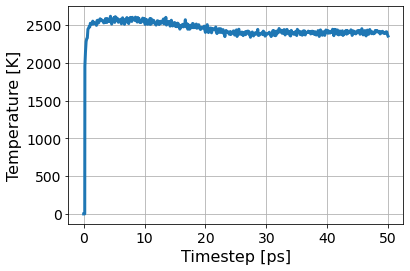

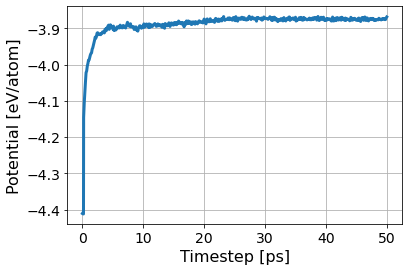

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/f7401a46cdc54ff9af4cdcc72f360760/inputs.yaml
       RUNS/f7401a46cdc54ff9af4cdcc72f360760
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/f7401a46cdc54ff9af4cdcc72f360760/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [17:35<00:00, 42.20s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/f7401a46cdc54ff9af4cdcc72f360760/inputs.yaml
       RUNS/f7401a46cdc54ff9af4cdcc72f360760
Predicted melting temperature for this potential:  2424.3040417910447
95% confidence interval:  3.8867359615479384
Fraction of system solid:  0.23697916666666666
Fraction of system liquid:  0.7384982638888888
Simulation Success Flag 0.0
Crystal Structure Info:  [1.092e+03 4.800e+01 4.100e+01 2.200e+01 2.000e+00 3.403e+03 4.608e+03]


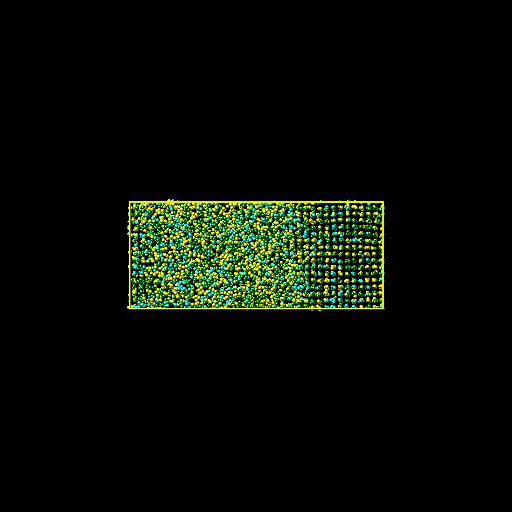

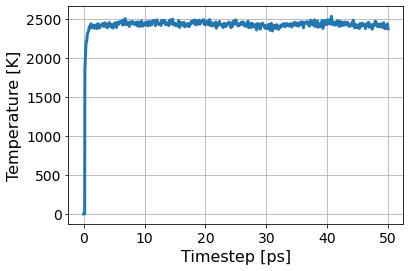

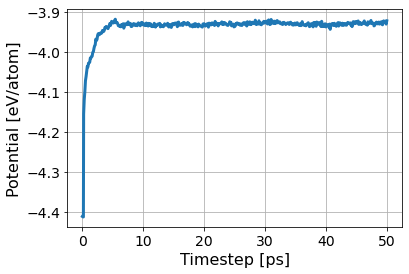

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/00dc7963cc8649319dd1f347cf8f766a/inputs.yaml
       RUNS/00dc7963cc8649319dd1f347cf8f766a
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/00dc7963cc8649319dd1f347cf8f766a/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [18:06<00:00, 43.47s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/00dc7963cc8649319dd1f347cf8f766a/inputs.yaml
       RUNS/00dc7963cc8649319dd1f347cf8f766a
Predicted melting temperature for this potential:  2419.7569303482587
95% confidence interval:  3.1395535202833034
Fraction of system solid:  0.4733072916666667
Fraction of system liquid:  0.4898003472222222
Simulation Success Flag 1.0
Crystal Structure Info:  [2.181e+03 8.700e+01 7.900e+01 4.000e+00 0.000e+00 2.257e+03 4.608e+03]


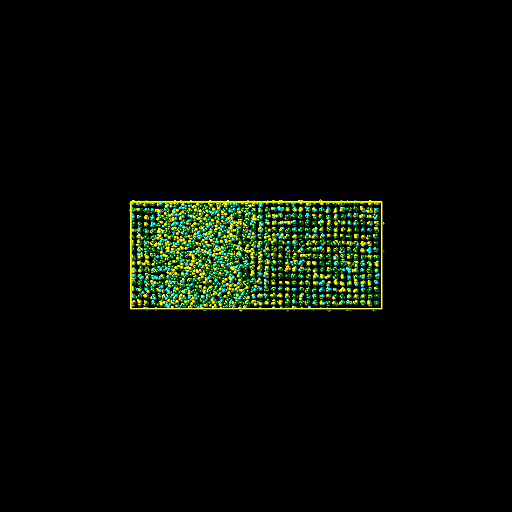

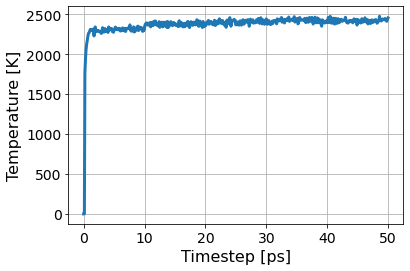

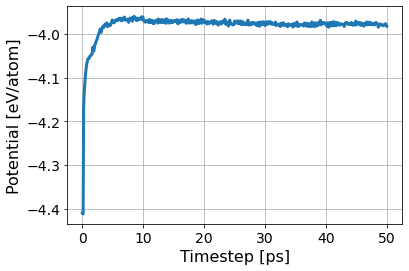

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  7
546
[0.0, 0.5, 0.0, 0.3, 0.2]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/a48694bca5164520bee4bedc6ad3c5e0/inputs.yaml
       RUNS/a48694bca5164520bee4bedc6ad3c5e0
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/a48694bca5164520bee4bedc6ad3c5e0/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [17:51<00:00, 42.85s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/a48694bca5164520bee4bedc6ad3c5e0/inputs.yaml
       RUNS/a48694bca5164520bee4bedc6ad3c5e0
Predicted melting temperature for this potential:  2553.3191174129356
95% confidence interval:  3.255581447034311
Fraction of system solid:  0.0006510416666666666
Fraction of system liquid:  0.9898003472222222
Simulation Success Flag 0.0
Crystal Structure Info:  [3.000e+00 2.600e+01 1.000e+00 1.600e+01 1.000e+00 4.561e+03 4.608e+03]


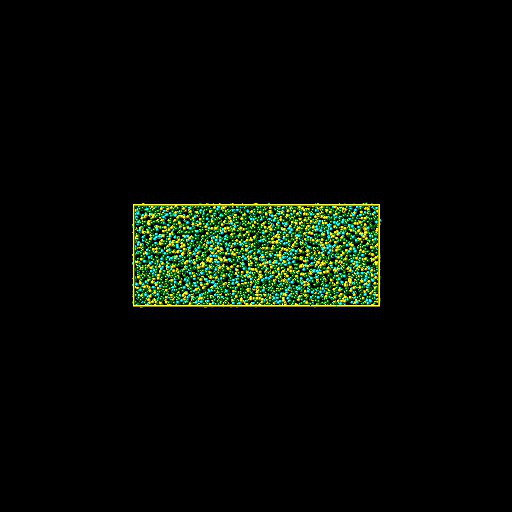

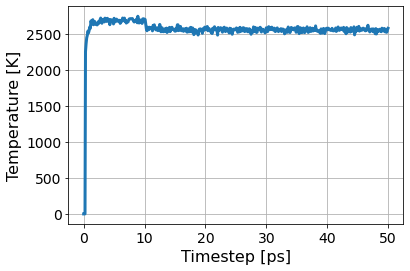

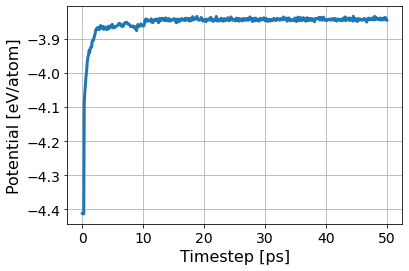

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/511732fb46704f70b2de1487934719f1/inputs.yaml
       RUNS/511732fb46704f70b2de1487934719f1
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/511732fb46704f70b2de1487934719f1/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [18:03<00:00, 43.36s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/511732fb46704f70b2de1487934719f1/inputs.yaml
       RUNS/511732fb46704f70b2de1487934719f1
Predicted melting temperature for this potential:  2391.0716054726367
95% confidence interval:  2.9719834620825116
Fraction of system solid:  0.00043402777777777775
Fraction of system liquid:  0.9889322916666666
Simulation Success Flag 0.0
Crystal Structure Info:  [2.000e+00 2.400e+01 0.000e+00 2.500e+01 0.000e+00 4.557e+03 4.608e+03]


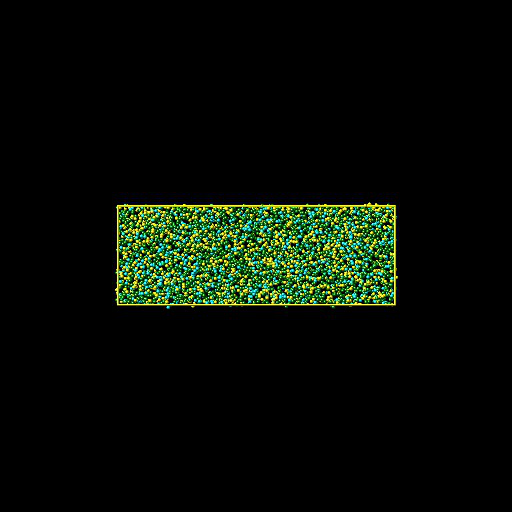

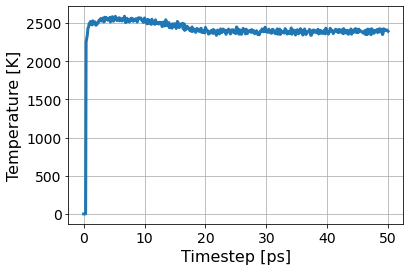

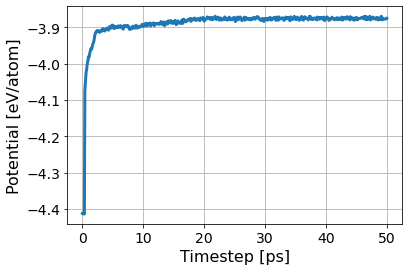

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/80a15e1022d44f5fabd261c70d5f1466/inputs.yaml
       RUNS/80a15e1022d44f5fabd261c70d5f1466
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/80a15e1022d44f5fabd261c70d5f1466/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [18:08<00:00, 43.53s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/80a15e1022d44f5fabd261c70d5f1466/inputs.yaml
       RUNS/80a15e1022d44f5fabd261c70d5f1466
Predicted melting temperature for this potential:  2395.189619402985
95% confidence interval:  3.436277373706311
Fraction of system solid:  0.2306857638888889
Fraction of system liquid:  0.744140625
Simulation Success Flag 0.0
Crystal Structure Info:  [1063.   66.   36.   14.    0. 3429. 4608.]


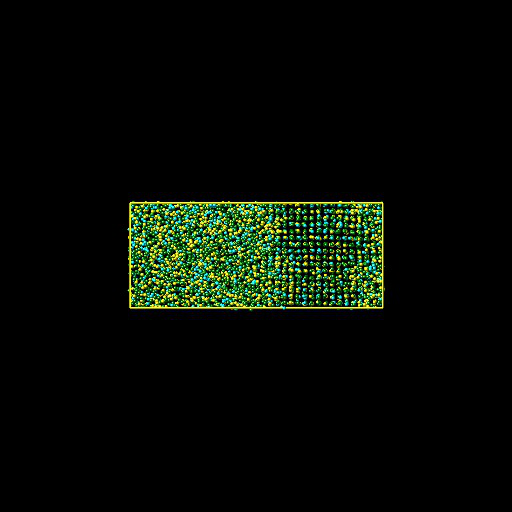

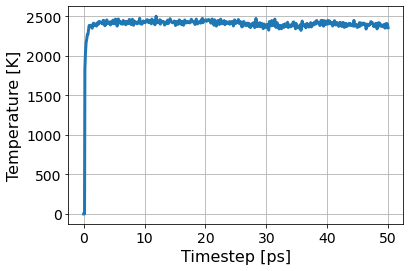

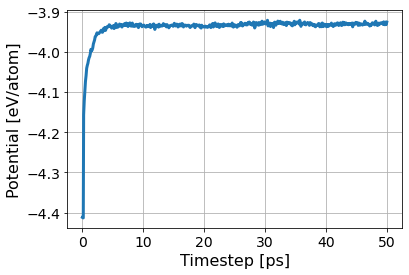

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/bc41d065a09f4d7aabca16e3ceb5c383/inputs.yaml
       RUNS/bc41d065a09f4d7aabca16e3ceb5c383
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/bc41d065a09f4d7aabca16e3ceb5c383/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [18:24<00:00, 44.18s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/bc41d065a09f4d7aabca16e3ceb5c383/inputs.yaml
       RUNS/bc41d065a09f4d7aabca16e3ceb5c383
Predicted melting temperature for this potential:  2339.251491542289
95% confidence interval:  3.0448269497898774
Fraction of system solid:  0.3745659722222222
Fraction of system liquid:  0.603515625
Simulation Success Flag 1.0
Crystal Structure Info:  [1.726e+03 5.400e+01 3.600e+01 1.000e+01 1.000e+00 2.781e+03 4.608e+03]


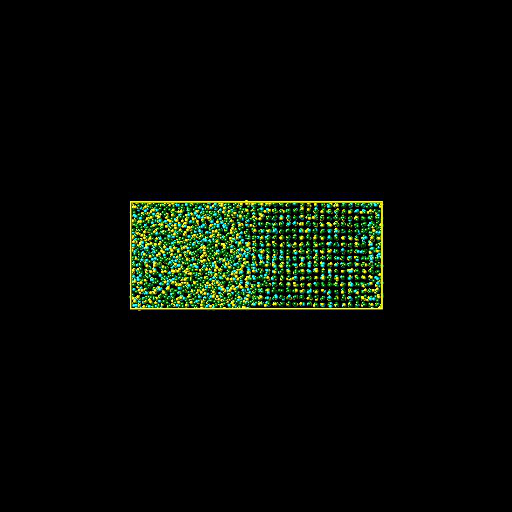

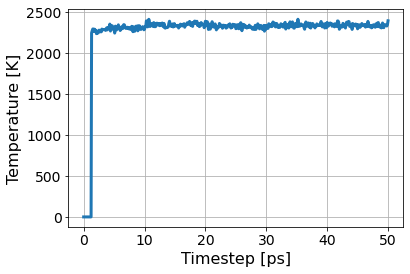

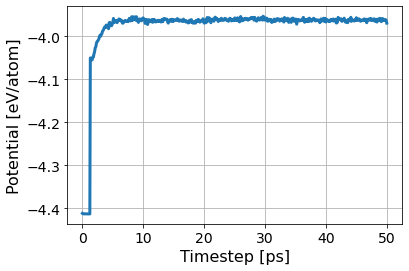

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  8
304
[0.0, 0.2, 0.1, 0.5, 0.2]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/d572fc832cf347b29487f9f5487d371b/inputs.yaml
       RUNS/d572fc832cf347b29487f9f5487d371b
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/d572fc832cf347b29487f9f5487d371b/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [18:22<00:00, 44.11s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/d572fc832cf347b29487f9f5487d371b/inputs.yaml
       RUNS/d572fc832cf347b29487f9f5487d371b
Predicted melting temperature for this potential:  2679.902763681592
95% confidence interval:  3.4739599712944225
Fraction of system solid:  0.001736111111111111
Fraction of system liquid:  0.9908854166666666
Simulation Success Flag 0.0
Crystal Structure Info:  [8.000e+00 1.900e+01 2.000e+00 1.300e+01 0.000e+00 4.566e+03 4.608e+03]


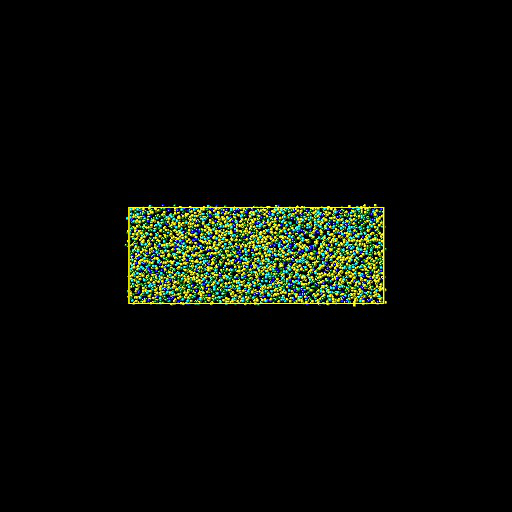

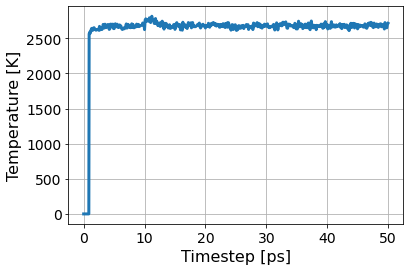

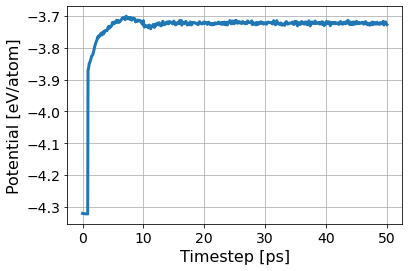

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/e2e8afad408e49428c1755e12e5d62c2/inputs.yaml
       RUNS/e2e8afad408e49428c1755e12e5d62c2
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/e2e8afad408e49428c1755e12e5d62c2/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [19:20<00:00, 46.42s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/e2e8afad408e49428c1755e12e5d62c2/inputs.yaml
       RUNS/e2e8afad408e49428c1755e12e5d62c2
Predicted melting temperature for this potential:  2465.1630184079604
95% confidence interval:  3.2195883461772907
Fraction of system solid:  0.0013020833333333333
Fraction of system liquid:  0.9876302083333334
Simulation Success Flag 0.0
Crystal Structure Info:  [6.000e+00 2.600e+01 2.000e+00 2.200e+01 1.000e+00 4.551e+03 4.608e+03]


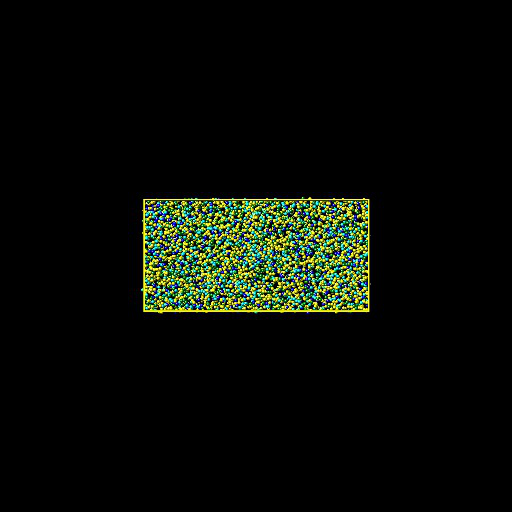

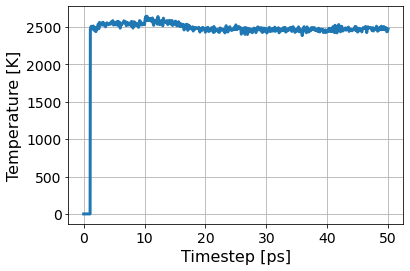

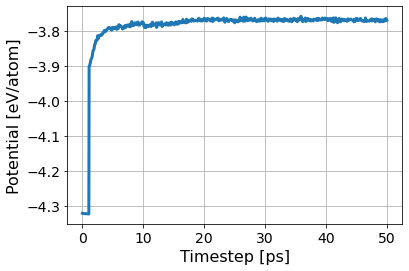

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/f24a04cb3b5b4727a1cb2db7357ee29d/inputs.yaml
       RUNS/f24a04cb3b5b4727a1cb2db7357ee29d
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/f24a04cb3b5b4727a1cb2db7357ee29d/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [18:10<00:00, 43.61s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/f24a04cb3b5b4727a1cb2db7357ee29d/inputs.yaml
       RUNS/f24a04cb3b5b4727a1cb2db7357ee29d
Predicted melting temperature for this potential:  2329.1689502487566
95% confidence interval:  5.314668744750096
Fraction of system solid:  0.0010850694444444445
Fraction of system liquid:  0.9889322916666666
Simulation Success Flag 0.0
Crystal Structure Info:  [   5.   20.    0.   26.    0. 4557. 4608.]


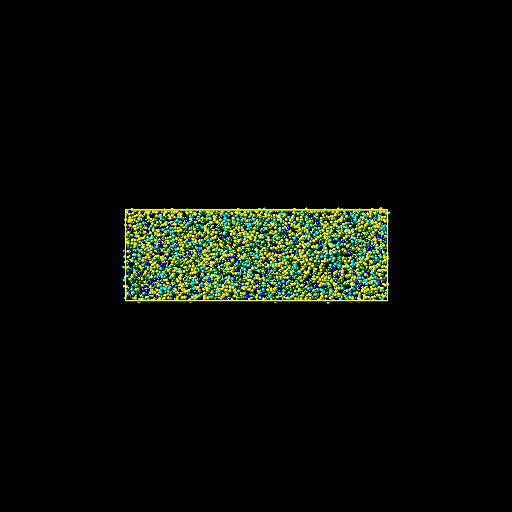

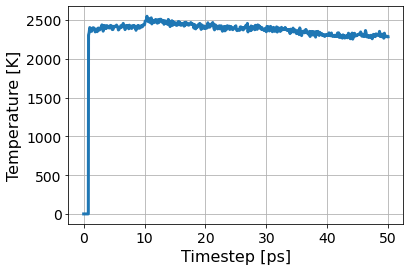

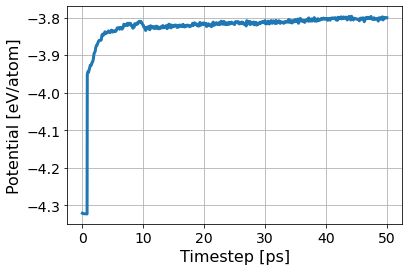

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/0e9e613fbed8484c916b402e4ab54dd3/inputs.yaml
       RUNS/0e9e613fbed8484c916b402e4ab54dd3
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/0e9e613fbed8484c916b402e4ab54dd3/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [18:29<00:00, 44.36s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/0e9e613fbed8484c916b402e4ab54dd3/inputs.yaml
       RUNS/0e9e613fbed8484c916b402e4ab54dd3
Predicted melting temperature for this potential:  2377.5527592039803
95% confidence interval:  3.413296724520171
Fraction of system solid:  0.4027777777777778
Fraction of system liquid:  0.5796440972222222
Simulation Success Flag 1.0
Crystal Structure Info:  [1.856e+03 5.000e+01 2.000e+01 1.000e+01 1.000e+00 2.671e+03 4.608e+03]


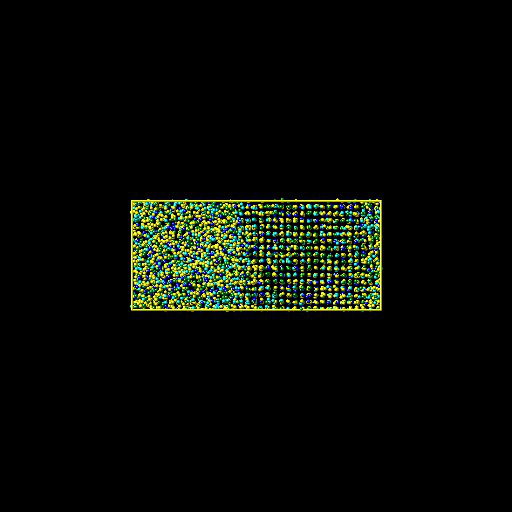

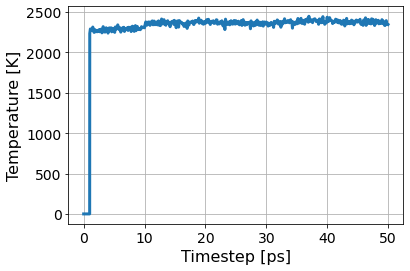

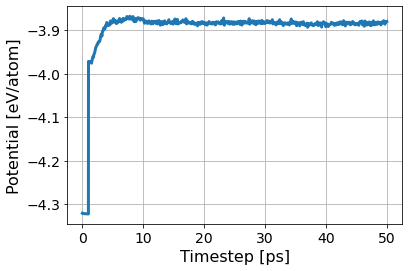

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  9
182
[0.0, 0.1, 0.1, 0.5, 0.3]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/a9905adf8f96415c902bb489e28bf3e1/inputs.yaml
       RUNS/a9905adf8f96415c902bb489e28bf3e1
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/a9905adf8f96415c902bb489e28bf3e1/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [18:14<00:00, 43.76s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/a9905adf8f96415c902bb489e28bf3e1/inputs.yaml
       RUNS/a9905adf8f96415c902bb489e28bf3e1
Predicted melting temperature for this potential:  2700.7969631840797
95% confidence interval:  3.638174677414831
Fraction of system solid:  0.0008680555555555555
Fraction of system liquid:  0.9954427083333334
Simulation Success Flag 0.0
Crystal Structure Info:  [4.000e+00 1.000e+01 1.000e+00 6.000e+00 0.000e+00 4.587e+03 4.608e+03]


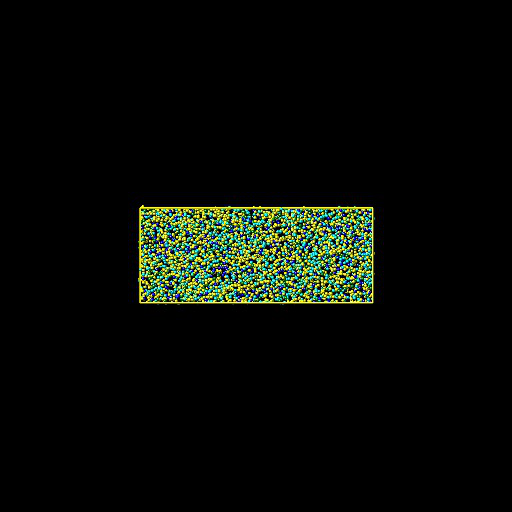

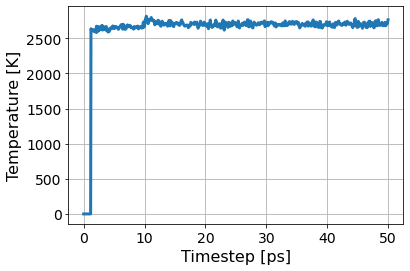

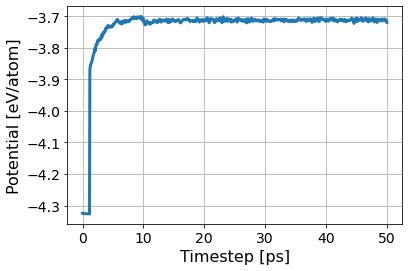

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/fac0b491e9af4716b0eb7a4bd7c96d24/inputs.yaml
       RUNS/fac0b491e9af4716b0eb7a4bd7c96d24
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/fac0b491e9af4716b0eb7a4bd7c96d24/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [18:21<00:00, 44.04s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/fac0b491e9af4716b0eb7a4bd7c96d24/inputs.yaml
       RUNS/fac0b491e9af4716b0eb7a4bd7c96d24
Predicted melting temperature for this potential:  2504.4675905472636
95% confidence interval:  3.2988889191042707
Fraction of system solid:  0.001736111111111111
Fraction of system liquid:  0.9908854166666666
Simulation Success Flag 0.0
Crystal Structure Info:  [   8.   17.    0.   17.    0. 4566. 4608.]


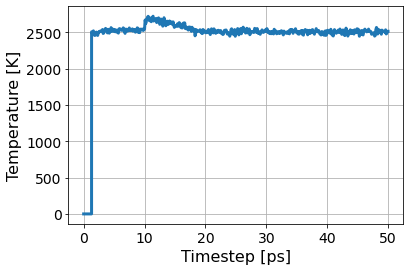

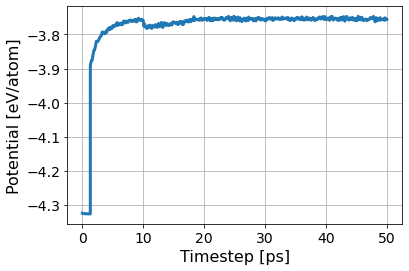

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/015d487fa069443c9d9ab2a09736356c/inputs.yaml
       RUNS/015d487fa069443c9d9ab2a09736356c
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/015d487fa069443c9d9ab2a09736356c/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [18:08<00:00, 43.56s/cell] 


In [ ]:
n_steps = 40 #number of expirements
all_inds = set(range(len(y))) #set indexes
actaul_exp = np.sum(in_train)-len(initial_data)
gif_images = [] #list to save gifs as 2D array

history_train = [list(set(np.where(in_train)[0].tolist()))]
current_train_inds = []
#reset_comps = all_compositions.reset_index(drop=True)

#Create dataframe to save values to make into excel
saved_data = pd.DataFrame(columns=['IAF','Composition','Experiment',"Simulated Tm","Predicted Tm","Predicted Uncertainty","T_Solid","T_Liquid","Index"])
df2 = pd.DataFrame(columns = sample)

patience_counter = 0

print(len(history_train[-1]))

for i in range(n_steps):

    print("-------------------------------------------------------------")
    print("Experiment # ", i)
    
    current_train_inds = history_train[-1].copy()

    current_search_inds = list(all_inds.difference(current_train_inds))
    
    #Random Forest fitting and predicting
    model.fit(X[current_train_inds], y[current_train_inds]) #train model, with entry_number
    current_y_pred, current_y_std = model.predict(X[current_search_inds], return_std=True) #pred

    # ACQUISITION FUNCTIONS
    
    # EARLY STOPPING / ACQUISITION
    
    iaf = "MEI"
    
    if iaf == "MEI":
    
        index_of_prediction = np.argmax(current_y_pred)    # MEI   
        
        if np.max(current_y_pred) < np.max(y[current_train_inds]):
            patience_counter +=1
        else:
            patience_counter = 0
    
    elif iaf == "UCB":
        
        index_of_prediction = np.argmax([sum(x) for x in zip(current_y_pred, current_y_std)]) # UCB     
        
        if np.max([sum(x) for x in zip(current_y_pred, current_y_std)]) < np.max(y[current_train_inds]):
            patience_counter +=1
        else:
            patience_counter = 0        
    
    elif iaf == "MLI":
    
        index_of_prediction = np.argmax(np.divide(current_y_pred - np.max(y[current_train_inds]), current_y_std)) # MLI
    
        if np.max(current_y_pred) < np.max(y[current_train_inds]):
            patience_counter +=1
        else:
            patience_counter = 0
    
    
    elif iaf == "MU":
        
        index_of_prediction = np.argmax(current_y_std) # MU
        
        if np.max(current_y_std) < 50:
            patience_counter +=1
        else:
            patience_counter = 0
        
        
    else:
        index_of_prediction = np.random.choice(current_search_inds)           # Random    
    
#     if patience_counter > 15:
#         print("Early Stop")
#         break
        
    chosen_index_forsimul = current_search_inds[index_of_prediction]    
    composition_forsimul = all_compositions.iloc[chosen_index_forsimul] #compositions for simulation
    
    #printing index and compistion
    print(chosen_index_forsimul)
    print(list(composition_forsimul))

    # RUNNING MELTHEAS SIM

    # setting inputs
    sim_gif = []
    flag = False
    plus = 0.50
    minus = 0.25    
    iteration = 0
    
    T_ROM = current_y_pred[index_of_prediction]    
    
    while (flag == False):
        inputs = getSimToolInputs(MeltHEA)
        
        random_seed = int(np.random.randint(1,10000,1)[0])
        velocity_seed = int(np.random.randint(1,10000,1)[0])
        
        inputs.rand_seed.value = random_seed
        inputs.velocity_seed.value = velocity_seed
                
        inputs.time.value = 50000
        inputs.box_length.value = 18
        c1, c2, c3, c4, c5 = list(composition_forsimul)
        inputs.composition1.value = c1
        inputs.composition2.value = c2
        inputs.composition3.value = c3
        inputs.composition4.value = c4
        inputs.composition5.value = c5
        
        inputs.Tsolid.value = (T_ROM-(T_ROM*minus))
        inputs.Tliquid.value = (T_ROM+(T_ROM*plus))

        # running and outputs 
        r = Run(MeltHEA, inputs)

        melting_temperature_obtained = r.read('melting_temperature')
        flag = r.read('successful')
        fraction_solid = r.read('fraction_solid')
        fraction_liquid = r.read('fraction_liquid')
        sim_gif.append(r.read('final_snapshot'))

        print ("Predicted melting temperature for this potential: ", (r.read('melting_temperature')))
        print ("95% confidence interval: ", (r.read('melting_temperature_ci')))
        print ("Fraction of system solid: ", (r.read('fraction_solid')))
        print ("Fraction of system liquid: ", (r.read('fraction_liquid')))
        print ("Simulation Success Flag", (r.read('successful')))
        print ('Crystal Structure Info: ', r.read('counts_array'))
        display(r.read('final_snapshot'))

        if (flag == False):
            if fraction_solid >= fraction_liquid:
                T_ROM += T_ROM*.05 #~80
            elif fraction_liquid >= fraction_solid:
                T_ROM -= T_ROM*.05 #~80
                
         #Graph from the melting workflow
        import matplotlib.pyplot as plt
        #Total number of atoms for 8x8 BCC unit cell cross-section and user input box-length
        if inputs.crystal_structure.value == 'bcc':
            atom_count = 8*8*2*inputs.box_length.value

        #Total number of atoms for 8x8 FCC unit cell cross-section and user input box-length
        elif inputs.crystal_structure.value == 'fcc':
            atom_count = 8*8*4*inputs.box_length.value

        ts = r.read('time_series')

        temperature = r.read('temperature_series')
        plt.plot((ts/1000),temperature,linewidth=3)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.xlabel('Timestep [ps]',fontsize=16)
        plt.ylabel('Temperature [K]',fontsize=16)
        plt.grid()
        plt.show()

        potential_energy = r.read('potential_energy_series')
        plt.plot((ts/1000),np.divide(potential_energy,atom_count),linewidth=3)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.xlabel('Timestep [ps]',fontsize=16)
        plt.ylabel('Potential [eV/atom]',fontsize=16)
        plt.grid()
        plt.show() 

    y[chosen_index_forsimul] = melting_temperature_obtained
    
    #Ending when desired temp found
    if melting_temperature_obtained > 2600:
        continue

    current_train_inds.append(chosen_index_forsimul) #from inputs choosing untrained indexes randomly
    history_train.append(current_train_inds) #storage list, of sets of values created throughout sequential learning
    
    composition_string = " ".join([i + ' ' + str(j) for i, j in zip(["Cr","Co","Cu","Fe","Ni"], composition_forsimul)])
    
    T_Solid = inputs.Tsolid.value
    T_Liquid = inputs.Tliquid.value
    
    
    #Creating dataframe for Animation
    data = pd.DataFrame([iaf,composition_string, actaul_exp, melting_temperature_obtained, current_y_pred[index_of_prediction],
                         current_y_std[index_of_prediction], T_Solid, T_Liquid,chosen_index_forsimul, random_seed, velocity_seed])
    data = data.T
    data = data.rename(columns = {0:'IAF', 1:'Composition',2:'Experiment',3: "Simulated Tm",4: "Predicted Tm",5:"Predicted Uncertainty",6:"T_Solid",7:"T_Liquid",8:"Index", 9:"RandomSeed", 10:"VelocitySeed"})
    saved_data = saved_data.append(data)
    actaul_exp = actaul_exp + 1
    
    #Saving Information into file
    files_to_saved_data = saved_data
    if list_seq_learn:
        files_to_saved_data = saved_data.append(seq_learn_data)
    files_to_saved_data = files_to_saved_data.sort_values(by='Experiment')
    
    csv_file_name2 = '{0}_melting_8labels50pico{1}.csv'.format(iaf,len(list_seq_learn))
    files_to_saved_data.to_csv(csv_file_name2, index = False)
    
    #Getting Images for Gif
    gif_images.append(sim_gif)
    

In [ ]:
display(saved_data)

In [ ]:
print(current_search_inds)

# Save Runs Into CSV

In [ ]:
if list_seq_learn:
    saved_data = saved_data.append(seq_learn_data)
saved_data = saved_data.sort_values(by='Experiment')
display(saved_data)

In [ ]:
csv_file_name2 = '{0}_melting_8labels50pico{1}.csv'.format(iaf,len(list_seq_learn))
saved_data.to_csv(csv_file_name2, index = False)

Exception in thread IPythonHistorySavingThread:
Traceback (most recent call last):
  File "/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/IPython/core/history.py", line 780, in writeout_cache
    self._writeout_input_cache(conn)
  File "/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/IPython/core/history.py", line 764, in _writeout_input_cache
    (self.session_number,)+line)
sqlite3.IntegrityError: UNIQUE constraint failed: history.session, history.line

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/IPython/core/history.py", line 834, in run
    self.history_manager.writeout_cache(self.db)
  File "</apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/decorator.py:decorator-gen-23>", line 2, in writeout_cache
  File "/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/IPyth